# Leopard challenge Classification

## Загрузка данных
Данные беру из leopard-challenge-classification.zip
https://drive.google.com/file/d/1OYjGYeYQzKI3mE02ymtkrbRJb5EurpL7/view?usp=sharing

# Colab

In [1]:
! gdown --id 1OYjGYeYQzKI3mE02ymtkrbRJb5EurpL7

"gdown" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


! unzip /content/leopard-challenge-classification.zip -d /content/leopard-challenge-classification/

In [9]:
! unzip / content / leopard-challenge-classification.zip -d / content / leopard_challenge_classification /

"unzip" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [32]:
import pandas as pd

In [1]:
df = pd.read_csv('/content/leopard_challenge_classification/train.csv')

NameError: name 'pd' is not defined

In [1]:
df.head()

NameError: name 'train' is not defined

In [ ]:
!pip install phik

!pip install feature_engine

!pip install catboost

# Pycharm

In [1]:
from zipfile import ZipFile

with ZipFile('leopard-challenge-classification.zip', 'r') as zf:
    zf.extractall()

# 1. Задача

Дан набор данных с основными клиническими показателями людей.
Каждая строчка в датасете - клинические показатели одного человека - рост, вес, зрение и т.д.
**Задача:** Определить, курит человек или нет, на основании его показателей.

# 2. Импорт библиотек

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import phik
import folium
from feature_engine.selection import SmartCorrelatedSelection
from feature_engine.imputation import RandomSampleImputer
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, log_loss
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool, cv
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import warnings

warnings.filterwarnings("ignore")
plt.style.use('seaborn-colorblind')
pd.set_option('display.max_columns', 100)

# 3. Загрузка Датасета

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,2791,65,170,75,91.0,0.6,0.9,1.0,1.0,122.0,79.0,107.0,119.0,51.0,71.0,52.0,14.0,3.0,1.2,20.0,16.0,122.0,Y,0,N,0
1,18280,35,170,85,97.0,1.5,1.5,1.0,1.0,138.0,88.0,117.0,204.0,239.0,46.0,120.0,14.6,1.0,0.7,20.0,25.0,40.0,Y,0,Y,1
2,1618,70,165,55,75.0,0.8,1.0,1.0,1.0,115.0,63.0,128.0,165.0,60.0,68.0,85.0,14.7,1.0,0.7,15.0,13.0,19.0,Y,0,Y,0
3,16856,35,180,85,83.0,1.2,1.0,1.0,1.0,130.0,80.0,100.0,209.0,155.0,53.0,125.0,17.2,1.0,0.8,22.0,18.0,17.0,Y,0,Y,0
4,5885,25,170,65,80.0,1.5,1.2,1.0,1.0,135.0,75.0,94.0,153.0,73.0,58.0,80.0,16.5,1.0,1.0,20.0,13.0,14.0,Y,0,Y,1


In [4]:
df.shape

(13863, 26)

In [5]:
df_test = pd.read_csv('test.csv')

In [6]:
df.head()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,2791,65,170,75,91.0,0.6,0.9,1.0,1.0,122.0,79.0,107.0,119.0,51.0,71.0,52.0,14.0,3.0,1.2,20.0,16.0,122.0,Y,0,N,0
1,18280,35,170,85,97.0,1.5,1.5,1.0,1.0,138.0,88.0,117.0,204.0,239.0,46.0,120.0,14.6,1.0,0.7,20.0,25.0,40.0,Y,0,Y,1
2,1618,70,165,55,75.0,0.8,1.0,1.0,1.0,115.0,63.0,128.0,165.0,60.0,68.0,85.0,14.7,1.0,0.7,15.0,13.0,19.0,Y,0,Y,0
3,16856,35,180,85,83.0,1.2,1.0,1.0,1.0,130.0,80.0,100.0,209.0,155.0,53.0,125.0,17.2,1.0,0.8,22.0,18.0,17.0,Y,0,Y,0
4,5885,25,170,65,80.0,1.5,1.2,1.0,1.0,135.0,75.0,94.0,153.0,73.0,58.0,80.0,16.5,1.0,1.0,20.0,13.0,14.0,Y,0,Y,1


In [7]:
df_test.shape

(5942, 25)

# 4. PDA - Получение информации о Датасете

## 4.1 Подготовка таблиц

### Перевод названий колонок в строчные буквы и замена пробелов

In [8]:
df.columns = df.columns.str.replace(' ', '_').str.replace('(', '_').str.replace(')', '_').str.lower()
df_test.columns = df_test.columns.str.replace(' ', '_').str.replace('(', '_').str.replace(')', '_').str.lower()

In [9]:
df.head()

,id,age,height_cm_,weight_kg_,waist_cm_,eyesight_left_,eyesight_right_,hearing_left_,hearing_right_,systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,oral,dental_caries,tartar,smoking
0,2791,65,170,75,91.0,0.6,0.9,1.0,1.0,122.0,79.0,107.0,119.0,51.0,71.0,52.0,14.0,3.0,1.2,20.0,16.0,122.0,Y,0,N,0
1,18280,35,170,85,97.0,1.5,1.5,1.0,1.0,138.0,88.0,117.0,204.0,239.0,46.0,120.0,14.6,1.0,0.7,20.0,25.0,40.0,Y,0,Y,1
2,1618,70,165,55,75.0,0.8,1.0,1.0,1.0,115.0,63.0,128.0,165.0,60.0,68.0,85.0,14.7,1.0,0.7,15.0,13.0,19.0,Y,0,Y,0
3,16856,35,180,85,83.0,1.2,1.0,1.0,1.0,130.0,80.0,100.0,209.0,155.0,53.0,125.0,17.2,1.0,0.8,22.0,18.0,17.0,Y,0,Y,0
4,5885,25,170,65,80.0,1.5,1.2,1.0,1.0,135.0,75.0,94.0,153.0,73.0,58.0,80.0,16.5,1.0,1.0,20.0,13.0,14.0,Y,0,Y,1


# 6. Preprocessing

## 6.1 Удаление выбросов

### Waist - окружность талии

У половины пациентов окружность талии составляет от 79 до 90 см
**Выбросы в сравнении с тестовой выборкой:** ВСЕГО 2 пациента > 121

In [10]:
df = df.query('waist_cm_ < 121')

### Systolic - систолическое давление

У половины пациентов систолическое давление находится в пределах от 115 до 131
**Выбросы в сравнении с тестовой выборкой:** ВСЕГО 3 пациента: 1 пациент > 200, 2 пациента < 85

In [13]:
df = df.query('systolic < 200 & systolic > 85')

У половины пациентов диастолическое давление находится в пределах от 70 до 83
**Выбросы в сравнении с тестовой выборкой:** ВСЕГО 2 пациента: 1 пациент > 133, 1 пациент < 45

In [14]:
df = df.query('relaxation < 135 & relaxation > 45')

### Fasting blood sugar - Сахар в крови

У половины пациентов сахар в крови находится в пределах от 90 до 104
**Выбросы в сравнении с тестовой выборкой:** Всего 2 пациента: 1 пациент > 400, 1 пациент < 50

In [15]:
df = df.query('fasting_blood_sugar < 400 & fasting_blood_sugar > 50')

### Cholesterol - холестерин

У половины пациентов холестерин находится в пределах от 169 до 216
**Выбросы в сравнении с тестовой выборкой:** ВСЕГО 2 пациента > 400,

In [16]:
df = df.query('cholesterol < 400')

### Triglyceride - триглицерид

У половины пациентов триглицерид находится в пределах от 78 до 166
**Выбросы в сравнении с тестовой выборкой:** ВСЕГО 6 пациентов < 20,

In [17]:
df = df.query('triglyceride > 20')

### HDL - холестерин липопротеинов высокой плотности

У половины пациентов холестерин липопротеинов находится в пределах от 45 до 61
**Выбросы в сравнении с тестовой выборкой:** ВСЕГО 4 пациента: 1 пациент > 160, 3 пациента < 20,

In [18]:
df = df.query('hdl < 160 & hdl > 20')

### LDL - липопротеины низкой плотности

У половины пациентов липопротеины находится в пределах от 91 до 135
**Выбросы в сравнении с тестовой выборкой** ВСЕГО 9 пациентов: 6 пациентов > 1100, 3 пациента < 10,

In [19]:
df = df.query('ldl < 1100 & ldl > 10')

### Hemoglobin - гемоглобин

У половины пациентов гемоглобин находится в пределах от 14.8 до 16.1
**Выбросы в сравнении с тестовой выборкой:** ВСЕГО 9 пациентов: 3 пациента > 19.4, 6 пациентов < 8.6,

In [20]:
df = df.query('hemoglobin < 19.4 & hemoglobin > 8.6')

### Serum creatinine - Сывороточный креатинин

У половины пациентов сывороточный креатинин находится в пределах от 0.9 до 1.1
**Выбросы в сравнении тестовой выборкой:** ВСЕГО 10 пациентов > 2.6

In [21]:
df = df.query('serum_creatinine < 2.6')

### AST - Аспартатаминотрансфераз

У половины пациентов Аспартатаминотрансфераз находится в пределах от 20 до 30
**Выбросы в сравнении с тестовой выборкой:** ВСЕГО 4 пациента: 3 пациента > 600, 1 пациент < 8

In [22]:
df = df.query('ast < 600 & ast > 8')

### ALT - Аланинаминотрансфераза

У половины пациентов Аланинаминотрансфераза находится в пределах от 18 до 35
**Выбросы в сравнении с тестовой выборкой:** ВСЕГО 3 пациента: 1 пациент > 1600, 2 пациента < 3

In [23]:
df = df.query('alt < 1600 & alt > 3')

### Итого:
Из обучающего выборки было дропнуто 54 переменные, что составляет 0.3% от обучающей выборки.:

In [24]:
df.shape

(13809, 26)

## 6.2 Список всех фич

Составлю список всех фичей
Сразу удаляю фичу oral, т.к. она не несёт полезной информации

In [31]:
df_copy = df.copy()
df_test_copy = df_test.copy()

In [32]:
X = df.drop(['oral', 'smoking'], axis=1)
y = df.smoking
cat_features = ['tartar']
df_test = df_test.drop('oral', axis=1)
df_test_copy = df_test_copy.drop('oral', axis=1)

KeyError: "['oral'] not found in axis"

In [33]:
X.head()

,id,age,height_cm_,weight_kg_,waist_cm_,eyesight_left_,eyesight_right_,hearing_left_,hearing_right_,systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,dental_caries,tartar
0,2791,65,170,75,91.0,0.6,0.9,1.0,1.0,122.0,79.0,107.0,119.0,51.0,71.0,52.0,14.0,3.0,1.2,20.0,16.0,122.0,0,N
1,18280,35,170,85,97.0,1.5,1.5,1.0,1.0,138.0,88.0,117.0,204.0,239.0,46.0,120.0,14.6,1.0,0.7,20.0,25.0,40.0,0,Y
2,1618,70,165,55,75.0,0.8,1.0,1.0,1.0,115.0,63.0,128.0,165.0,60.0,68.0,85.0,14.7,1.0,0.7,15.0,13.0,19.0,0,Y
3,16856,35,180,85,83.0,1.2,1.0,1.0,1.0,130.0,80.0,100.0,209.0,155.0,53.0,125.0,17.2,1.0,0.8,22.0,18.0,17.0,0,Y
4,5885,25,170,65,80.0,1.5,1.2,1.0,1.0,135.0,75.0,94.0,153.0,73.0,58.0,80.0,16.5,1.0,1.0,20.0,13.0,14.0,0,Y


In [34]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: smoking, dtype: int64

In [29]:
cat_features

['tartar']

In [30]:
ввввввввввввввввв

NameError: name 'ввввввввввввввввв' is not defined

# 7. Modeling

## Baseline catboost

### Обучающая и тестовая выборки
Разделю обучающую выборку на train и test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=659)

### Составаляю список фичей
В baselin`е оставлю все фичи

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
cat_features

### Создание Pool`ов для модели

In [ ]:
train_data = Pool(X_train, y_train, cat_features=cat_features)
test_data = Pool(X_test, y_test, cat_features=cat_features)
full_data = Pool(X, y, cat_features=cat_features)

### Baseline model

### Настройка гиперпараметров

In [ ]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'verbose': 100,
              'task_type': 'GPU'}

In [ ]:
model = CatBoostClassifier(**parameters)

### Обучение модели

In [ ]:
%%time
model.fit(train_data, eval_set=test_data, plot=True)

### Feature importance

In [ ]:
model.get_feature_importance(prettified=True)

In [ ]:
model.get_params()

In [ ]:
model.get_all_params()

### Прогнозирование

#### Скоры

Создаю колонку для baseline catboost скора

In [ ]:
df_test['baseline_cat_score'] = model.predict_proba(df_test)[:, 1]

In [ ]:
df_test.baseline_cat_score.head()

Распределение вероятностей (Score) курит или не курит

In [ ]:
df_test.baseline_cat_score.hist();

#### Пороги

Посмотрю на пользователей вероятность курения которых > 0.5
Для вывода 0-ей и 1-иц нужно домножить на 1 иначе будет True и False

In [ ]:
((df_test.baseline_cat_score > 0.5) * 1).mean()

Такая же вероятность у метода predict, т.к. порог по умолчанию = 0.5

In [ ]:
model.predict(df_test).mean()

В обучающем ДФ процент курильщиков ≈20% что существенно выше. ПО этому есть смысл понижать порог, но в Baselin`е оставлю порог по умолчанию

In [ ]:
df.smoking.mean()

In [ ]:
df_test['baseline_cat_pred'] = (df_test.baseline_cat_score > 0.5) * 1

In [ ]:
df_test.head()

### Сохранение результатов

In [ ]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = df_test.baseline_cat_pred
submission.to_csv('Baseline.csv', index=False)

Проверка значений:

In [ ]:
submission.smoking.mean()

In [ ]:
submission.head()

**Kaggle result:** 0.3117

### Модификация

#### Изменение порога

Изменю порог с 0.5 на 0.25

In [ ]:
((df_test.baseline_cat_score > 0.25) * 1).mean()

#### Сохранение результатов

In [ ]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = (df_test.baseline_cat_score > 0.25) * 1
submission.to_csv('Baseline_threshold0.25.csv', index=False)

In [ ]:
submission.head()

**Kaggle result:** 0.4175 ↑

#### Изменение порога

Изменю порог с 0.25 на 0.2

In [ ]:
((df_test.baseline_cat_score > 0.20) * 1).mean()

#### Сохранение результатов

In [ ]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = (df_test.baseline_cat_score > 0.2) * 1
submission.to_csv('Baseline_threshold0.2_GPU.csv', index=False)

In [ ]:
submission.smoking.mean()

In [ ]:
submission.head()

**Kaggle result:** 0.42861 ↑

#### Изменение порога

Изменю порог с 0.2 на 0.1

In [ ]:
((df_test.baseline_cat_score > 0.1) * 1).mean()

#### Сохранение результатов

In [ ]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = (df_test.baseline_cat_score > 0.1) * 1
submission.to_csv('Baseline_threshold0.1.csv', index=False)

In [ ]:
submission.head()

**Kaggle result:** 0.40293 ↓

#### Изменение порога

Изменю порог с 0.1 на 0.15

In [ ]:
((df_test.baseline_cat_score > 0.15) * 1).mean()

#### Сохранение результатов

In [ ]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = (df_test.baseline_cat_score > 0.15) * 1
submission.to_csv('Baseline_threshold0.15.csv', index=False)

In [ ]:
submission.head()

**Kaggle result:** 0.4259 ↑

### Итого:
Наилучший порог для Baseline ≈ 0.2, F1 = 0.4286; THRSH = 0.2, GPU, F1 = 43437

## Catboost CV

In [ ]:
parameters = {'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'iterations': 1000,
              'task_type': 'GPU'}

In [ ]:
%%time
cv_data = cv(
    params=parameters,
    pool=full_data,
    fold_count=5,
    shuffle=True,
    partition_random_seed=0,
    stratified=False,
    verbose=False,
    plot=True
)

In [ ]:
best_value = np.max(cv_data['test-F1-mean'])
best_iter = np.argmax(cv_data['test-F1-mean']) + 1

In [ ]:
best_iter, best_value

### Best iteration
Обучение на всех данных:

In [ ]:
parameters = {'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'iterations': best_iter,
              'verbose': 100,
              'task_type': 'GPU'}

In [ ]:
model = CatBoostClassifier(**parameters)

In [ ]:
%%time
model.fit(full_data, plot=True)

### Feature importance

In [ ]:
model.get_feature_importance(prettified=True)

In [ ]:
model.get_params()

In [ ]:
model.get_all_params()

### Прогноз

Создаю колонку для baseline catboost скора

In [ ]:
df_test['baseline_cat_cv_score'] = model.predict_proba(df_test)[:, 1]

In [ ]:
df_test.baseline_cat_cv_score.head()

In [ ]:
df_test.baseline_cat_cv_score.hist();

По порогу 0.5 вероятность ≈3.2%

In [ ]:
((df_test.baseline_cat_cv_score > 0.5) * 1).mean()

In [ ]:
df_test['baseline_cat_cv_pred'] = (df_test.baseline_cat_cv_score > 0.5) * 1

In [ ]:
df_test.head()

### Сохранение результатов

In [ ]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = df_test.baseline_cat_cv_pred
submission.to_csv('Cat_CV.csv', index=False)

In [ ]:
submission.head()

**Kaggle result:** 0.23138 ↓

#### Изменяю порог до 0.2

In [ ]:
((df_test.baseline_cat_cv_score > 0.2) * 1).mean()

In [ ]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = (df_test.baseline_cat_cv_score > 0.2) * 1
submission.to_csv('Cat_CV_GPU_THRS02_LR_auto.csv', index=False)

In [ ]:
submission.smoking.mean()

In [ ]:
submission.head()

**Kaggle result:** 0.43165 ↑ - лучше, чем Baseline THRS 0.2; GPU = 0.43217 ↑↑

#### Изменяю порог до 0.205

In [ ]:
((df_test.baseline_cat_cv_score > 0.205) * 1).mean()

In [ ]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = (df_test.baseline_cat_cv_score > 0.205) * 1
submission.to_csv('Cat_CV_THRS0205_LR_auto.csv', index=False)

In [ ]:
submission.smoking.mean()

In [ ]:
submission.head()

**Kaggle result:** 0.4284 ↓ - хуже, чем CV THRS 0.2

#### Изменяю порог до 0.195

In [ ]:
((df_test.baseline_cat_cv_score > 0.195) * 1).mean()

In [ ]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = (df_test.baseline_cat_cv_score > 0.195) * 1
submission.to_csv('Cat_CV_THRS0195_LR_auto.csv', index=False)

In [ ]:
submission.smoking.mean()

In [ ]:
submission.head()

**Kaggle result:** 0.42978 ↑ - лучше, чем Baseline THRS 0.2

### Итого:
Наилучший порог для CV ≈ 0.2, F1 = 0.43165. Хуже, чем Baseline GPU THRSH 0.2 (0.43437)

## Baseline model + ACW + GPU

### Настройка гиперпараметров

In [ ]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'verbose': 100,
              'auto_class_weights': 'Balanced',
              'task_type': 'GPU'}

In [ ]:
model = CatBoostClassifier(**parameters)

### Обучение модели

In [ ]:
%%time
model.fit(train_data, eval_set=test_data, plot=True)

### Feature importance

In [ ]:
model.get_feature_importance(prettified=True)

In [ ]:
model.get_params()

In [ ]:
model.get_all_params()

### Прогнозирование

#### Скоры

Создаю колонку для baseline catboost скора

In [ ]:
df_test['baseline_cat_score'] = model.predict_proba(df_test)[:, 1]

In [ ]:
df_test.baseline_cat_score.head()

Распределение вероятностей (Score) курит или не курит

In [ ]:
df_test.baseline_cat_score.hist();

#### Пороги

Посмотрю на пользователей вероятность курения которых > 0.5
Для вывода 0-ей и 1-иц нужно домножить на 1 иначе будет True и False

In [ ]:
((df_test.baseline_cat_score > 0.5) * 1).mean()

Такая же вероятность у метода predict, т.к. порог по умолчанию = 0.5

In [ ]:
model.predict(df_test).mean()

В обучающем ДФ процент курильщиков ≈20% что существенно выше. ПО этому есть смысл понижать порог, но в Baselin`е оставлю порог по умолчанию

In [ ]:
df.smoking.mean()

In [ ]:
df_test['baseline_cat_pred'] = (df_test.baseline_cat_score > 0.5) * 1

In [ ]:
df_test.head()

### Сохранение результатов

In [ ]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = df_test.baseline_cat_pred
submission.to_csv('Baseline_ACW_GPU.csv', index=False)

Проверка значений:

In [ ]:
submission.smoking.mean()

In [ ]:
submission.head()

**Kaggle result:** 0.43639

### Модификация

#### Изменение порога

Изменю порог с 0.5 на 0.501

In [ ]:
((df_test.baseline_cat_score > 0.501) * 1).mean()

#### Сохранение результатов

In [ ]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = (df_test.baseline_cat_score > 0.501) * 1
submission.to_csv('Baseline_ACW_GPU_THRSH_0.501.csv', index=False)

In [ ]:
submission.smoking.mean()

In [ ]:
submission.head()

**Kaggle result:** 0.43589 ↓, 0.501-0.43776 !!! ↑ МОЖНО ДОЖИМАТЬ ↑ 0.501 < X!!!

## Catboost CV + ACW + GPU

In [ ]:
parameters = {'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'iterations': 1000,
              'task_type': 'GPU',
              'auto_class_weights': 'Balanced'}

In [ ]:
%%time
cv_data = cv(
    params=parameters,
    pool=full_data,
    fold_count=5,
    shuffle=True,
    partition_random_seed=0,
    stratified=False,
    verbose=False,
    plot=True
)

In [ ]:
best_value = np.max(cv_data['test-F1-mean'])
best_iter = np.argmax(cv_data['test-F1-mean']) + 1

In [ ]:
best_iter, best_value

### Best iteration
Обучение на всех данных:

In [ ]:
parameters = {'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'iterations': best_iter,
              'verbose': 100,
              'task_type': 'GPU',
              'auto_class_weights': 'Balanced'}

In [ ]:
model = CatBoostClassifier(**parameters)

In [ ]:
%%time
model.fit(full_data, plot=True)

### Feature importance

In [ ]:
model.get_feature_importance(prettified=True)

In [ ]:
model.get_params()

In [ ]:
model.get_all_params()

### Прогноз

Создаю колонку для baseline catboost скора

In [ ]:
df_test['baseline_cat_cv_score'] = model.predict_proba(df_test)[:, 1]

In [ ]:
df_test.baseline_cat_cv_score.head()

In [ ]:
df_test.baseline_cat_cv_score.hist();

По порогу 0.5 вероятность ≈3.2%

In [ ]:
((df_test.baseline_cat_cv_score > 0.5) * 1).mean()

In [ ]:
df_test['baseline_cat_cv_pred'] = (df_test.baseline_cat_cv_score > 0.5) * 1

In [ ]:
df_test.head()

### Сохранение результатов

In [ ]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = df_test.baseline_cat_cv_pred
submission.to_csv('Cat_CV_ACW_GPU.csv', index=False)

In [ ]:
submission.smoking.mean()

In [ ]:
submission.head()

**Kaggle result:** 0.42672 ↓

#### Изменяю порог до 0.45

In [ ]:
((df_test.baseline_cat_cv_score > 0.45) * 1).mean()

In [ ]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = (df_test.baseline_cat_cv_score > 0.45) * 1
submission.to_csv('Cat_CV10_GPU_THRS045_LR_auto.csv', index=False)

In [ ]:
submission.smoking.mean()

In [ ]:
submission.head()

**Kaggle result:** 0.43046

In [ ]:
dddddddddddddddddd

## Catboost + ACW + GPU + Drop features

### Список фич

In [45]:
df.head()

,id,age,height_cm_,weight_kg_,waist_cm_,eyesight_left_,eyesight_right_,hearing_left_,hearing_right_,systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,oral,dental_caries,tartar,smoking
0,2791,65,170,75,91.0,0.6,0.9,1.0,1.0,122.0,79.0,107.0,119.0,51.0,71.0,52.0,14.0,3.0,1.2,20.0,16.0,122.0,Y,0,N,0
1,18280,35,170,85,97.0,1.5,1.5,1.0,1.0,138.0,88.0,117.0,204.0,239.0,46.0,120.0,14.6,1.0,0.7,20.0,25.0,40.0,Y,0,Y,1
2,1618,70,165,55,75.0,0.8,1.0,1.0,1.0,115.0,63.0,128.0,165.0,60.0,68.0,85.0,14.7,1.0,0.7,15.0,13.0,19.0,Y,0,Y,0
3,16856,35,180,85,83.0,1.2,1.0,1.0,1.0,130.0,80.0,100.0,209.0,155.0,53.0,125.0,17.2,1.0,0.8,22.0,18.0,17.0,Y,0,Y,0
4,5885,25,170,65,80.0,1.5,1.2,1.0,1.0,135.0,75.0,94.0,153.0,73.0,58.0,80.0,16.5,1.0,1.0,20.0,13.0,14.0,Y,0,Y,1


In [39]:
X = df.drop(['oral', 'smoking', 'hearing_left_', 'hearing_right_', 'id', 'eyesight_left_', 'eyesight_right_','urine_protein', 'height_cm_', 'systolic', 'cholesterol', ], axis=1)
y = df.smoking
cat_features = ['tartar']
# df_test = df_test.drop('oral', axis=1)
df_test_copy = df_test_copy.drop(['hearing_left_', 'hearing_right_', 'id', 'eyesight_left_', 'eyesight_right_','urine_protein', 'height_cm_', 'systolic', 'cholesterol', ], axis=1)

In [40]:
X.head()

,age,weight_kg_,waist_cm_,relaxation,fasting_blood_sugar,triglyceride,hdl,ldl,hemoglobin,serum_creatinine,ast,alt,gtp,dental_caries,tartar
0,65,75,91.0,79.0,107.0,51.0,71.0,52.0,14.0,1.2,20.0,16.0,122.0,0,N
1,35,85,97.0,88.0,117.0,239.0,46.0,120.0,14.6,0.7,20.0,25.0,40.0,0,Y
2,70,55,75.0,63.0,128.0,60.0,68.0,85.0,14.7,0.7,15.0,13.0,19.0,0,Y
3,35,85,83.0,80.0,100.0,155.0,53.0,125.0,17.2,0.8,22.0,18.0,17.0,0,Y
4,25,65,80.0,75.0,94.0,73.0,58.0,80.0,16.5,1.0,20.0,13.0,14.0,0,Y


In [41]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: smoking, dtype: int64

In [42]:
cat_features

['tartar']

### Обучающая и тестовая выборки
Разделю обучающую выборку на train и test

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=659)

### Создание Pool`ов для модели

In [44]:
train_data = Pool(X_train, y_train, cat_features=cat_features)
test_data = Pool(X_test, y_test, cat_features=cat_features)
full_data = Pool(X, y, cat_features=cat_features)

### Настройка гиперпараметров

In [ ]:
вввввввввввввввввввввввв

LR 0.01 - 0.03

In [296]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'verbose': 100,
              'auto_class_weights': 'Balanced',
              'task_type': 'GPU',
              'iterations': 1000,
              'early_stopping_rounds': 300}

In [297]:
model = CatBoostClassifier(**parameters)

### Обучение модели

In [298]:
%%time
model.fit(train_data, eval_set=test_data, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.058056
0:	learn: 0.6100672	test: 0.5636089	best: 0.5636089 (0)	total: 41.2ms	remaining: 41.2s
100:	learn: 0.6983700	test: 0.6161387	best: 0.6190550 (98)	total: 3.85s	remaining: 34.2s
200:	learn: 0.7375642	test: 0.6131263	best: 0.6194675 (107)	total: 7.71s	remaining: 30.6s
300:	learn: 0.7570418	test: 0.6003841	best: 0.6194675 (107)	total: 11.6s	remaining: 27s
400:	learn: 0.7716029	test: 0.5982121	best: 0.6194675 (107)	total: 15.6s	remaining: 23.4s
bestTest = 0.6194674581
bestIteration = 107
Shrink model to first 108 iterations.
CPU times: total: 20 s
Wall time: 16.4 s


Lr-auto=0.058056
bestTest = 0.6194674581
bestIteration = 107
LR = 0.03
bestTest = 0.6152708489
bestIteration = 381
LR = 0.02
bestTest = 0.6127704915
bestIteration = 399
LR = 0.04
bestTest = 0.61339383
bestIteration = 369
LR = 0.01
bestTest = 0.6167331055
bestIteration = 856
LR = 0.0581
bestTest = 0.6218981807
bestIteration = 209
**BEST LR** = 0.0583
bestTest = 0.6231496187
bestIteration = 271


### Feature importance

In [299]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,age,16.037052
1,gtp,15.553149
2,alt,11.059059
3,triglyceride,10.394328
4,hemoglobin,6.687902
5,ldl,6.351543
6,waist_cm_,5.977403
7,fasting_blood_sugar,4.483045
8,serum_creatinine,4.227178
9,ast,4.210789


In [300]:
model.get_params()

{'iterations': 1000,
 'loss_function': 'Logloss',
 'random_seed': 659,
 'verbose': 100,
 'auto_class_weights': 'Balanced',
 'eval_metric': 'F1',
 'task_type': 'GPU',
 'early_stopping_rounds': 300,
 'cat_features': ['tartar']}

In [301]:
model.get_all_params()

{'nan_mode': 'Min',
 'gpu_ram_part': 0.95,
 'eval_metric': 'F1',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'FeatureFreq:CtrBorderCount=15:CtrBorderType=Median:Prior=0/1'],
 'iterations': 1000,
 'fold_permutation_block': 64,
 'leaf_estimation_method': 'Newton',
 'observations_to_bootstrap': 'TestOnly',
 'od_pval': 0,
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Ordered',
 'ctr_history_unit': 'Sample',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'devices': '-1',
 'eval_fraction': 0,
 'pinned_memory_bytes': '104857600',
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'od_type': 'Iter',
 'rsm': 1,
 'boost_from_average': False,
 'gpu_cat_features_storage': 'GpuRam',
 'fold_size_loss_normalization': False,
 'ma

### Прогнозирование

#### Скоры

Создаю колонку для baseline catboost скора

In [302]:
df_test['baseline_cat_score'] = model.predict_proba(df_test_copy)[:, 1]

In [303]:
df_test.baseline_cat_score.head()

0    0.500722
1    0.078501
2    0.437625
3    0.347356
4    0.590422
Name: baseline_cat_score, dtype: float64

Распределение вероятностей (Score) курит или не курит

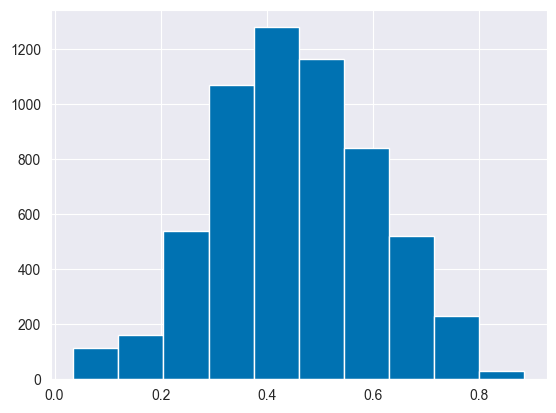

In [304]:
df_test.baseline_cat_score.hist();

#### Пороги

Посмотрю на пользователей вероятность курения которых > 0.5
Для вывода 0-ей и 1-иц нужно домножить на 1 иначе будет True и False

In [305]:
((df_test.baseline_cat_score > 0.5) * 1).mean()

0.3668798384382363

Такая же вероятность у метода predict, т.к. порог по умолчанию = 0.5

In [306]:
model.predict(df_test_copy).mean()

0.3668798384382363

In [307]:
df_test['baseline_cat_pred'] = (df_test.baseline_cat_score > 0.5) * 1

In [308]:
df_test.head()

,id,age,height_cm_,weight_kg_,waist_cm_,eyesight_left_,eyesight_right_,hearing_left_,hearing_right_,systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,dental_caries,tartar,baseline_cat_score,baseline_cat_pred
0,19200,40,170,75,87.0,1.2,1.0,1.0,1.0,140.0,90.0,131.0,225.0,216.0,52.0,129.0,16.4,1.0,1.1,25.0,58.0,43.0,0,Y,0.500722,1
1,7784,25,170,65,78.4,0.9,0.9,1.0,1.0,118.0,78.0,101.0,170.0,33.0,72.0,91.0,11.9,1.0,0.9,33.0,66.0,22.0,0,N,0.078501,0
2,11682,50,180,105,109.3,0.9,1.0,1.0,1.0,130.0,90.0,96.0,162.0,144.0,71.0,62.0,15.4,1.0,0.9,19.0,24.0,32.0,0,Y,0.437625,0
3,9949,60,160,60,81.0,0.5,0.5,1.0,1.0,118.0,76.0,97.0,172.0,91.0,46.0,108.0,16.2,1.0,1.2,34.0,37.0,26.0,0,Y,0.347356,0
4,9378,45,175,70,83.0,0.9,1.0,1.0,1.0,130.0,80.0,100.0,191.0,365.0,34.0,84.0,15.2,1.0,0.7,27.0,25.0,26.0,0,N,0.590422,1


### Сохранение результатов

In [273]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = df_test.baseline_cat_pred
submission.to_csv('Cat_ACW_GPU_drop9F.csv', index=False)

Проверка значений:

In [274]:
submission.smoking.mean()

0.36637495792662406

In [275]:
submission.head()

,id,smoking
0,19200,0
1,7784,0
2,11682,0
3,9949,0
4,9378,1


**Kaggle result:** 0.43846 ↑↑↑

### Модификация

#### Изменение порога

Изменю порог с 0.5 на 0.501

In [322]:
((df_test.baseline_cat_score > 0.4985) * 1).mean()

0.3695725345001683

In [309]:
((df_test.baseline_cat_score > 0.501) * 1).mean()

0.3640188488724335

In [310]:
((df_test.baseline_cat_score > 0.4988) * 1).mean()

0.3692359474924268

In [311]:
((df_test.baseline_cat_score > 0.4983) * 1).mean()

0.3699091215079098

#### Сохранение результатов

In [315]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = (df_test.baseline_cat_score > 0.4982) * 1
submission.to_csv('Cat_ACW_GPU_drop9F_THRSH0.4982.csv', index=False)

In [316]:
submission.smoking.mean()

0.37007741501178054

In [272]:
submission.head()

,id,smoking
0,19200,0
1,7784,0
2,11682,0
3,9949,0
4,9378,1


**Kaggle result:** 0.43889 - 0.501(36.4%), 0.43882 - 0.5012(36.33) надо пробовать меньше

## Catboost CV + ACW + GPU + Drop features

In [ ]:
parameters = {'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'iterations': 1000,
              'task_type': 'GPU',
              'auto_class_weights': 'Balanced'}

In [ ]:
%%time
cv_data = cv(
    params=parameters,
    pool=full_data,
    fold_count=5,
    shuffle=True,
    partition_random_seed=0,
    stratified=False,
    verbose=False,
    plot=True
)

In [ ]:
best_value = np.max(cv_data['test-F1-mean'])
best_iter = np.argmax(cv_data['test-F1-mean']) + 1

In [ ]:
best_iter, best_value

### Best iteration
Обучение на всех данных:

In [ ]:
parameters = {'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'iterations': best_iter,
              'verbose': 100,
              'task_type': 'GPU',
              'auto_class_weights': 'Balanced'}

In [ ]:
model = CatBoostClassifier(**parameters)

In [ ]:
%%time
model.fit(full_data, plot=True)

### Feature importance

In [ ]:
model.get_feature_importance(prettified=True)

In [ ]:
model.get_params()

In [ ]:
model.get_all_params()

### Прогноз

Создаю колонку для baseline catboost скора

In [ ]:
df_test['baseline_cat_cv_score'] = model.predict_proba(df_test_copy)[:, 1]

In [ ]:
df_test.baseline_cat_cv_score.head()

In [ ]:
df_test.baseline_cat_cv_score.hist();

По порогу 0.5 вероятность ≈3.2%

In [ ]:
((df_test.baseline_cat_cv_score > 0.5) * 1).mean()

In [ ]:
df_test['baseline_cat_cv_pred'] = (df_test.baseline_cat_cv_score > 0.5) * 1

In [ ]:
df_test.head()

### Сохранение результатов

In [ ]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = df_test.baseline_cat_cv_pred
submission.to_csv('Cat_CV_ACW_GPU.csv', index=False)

In [ ]:
submission.smoking.mean()

In [ ]:
submission.head()

**Kaggle result:** 0.42672 ↓

#### Изменяю порог до 0.45

In [ ]:
((df_test.baseline_cat_cv_score > 0.45) * 1).mean()

In [ ]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = (df_test.baseline_cat_cv_score > 0.45) * 1
submission.to_csv('Cat_CV_GPU_Drop9F_THRS045_LR_auto.csv', index=False)

In [ ]:
submission.smoking.mean()

In [ ]:
submission.head()

**Kaggle result:** 0.43046

## Grid Search

In [ ]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'verbose': 100,
              'auto_class_weights': 'Balanced',
              'task_type': 'GPU',
              'iterations': 1000}

In [ ]:
model = CatBoostClassifier(**parameters)

In [ ]:
pool = Pool(data=X_train, label=y_train, cat_features=cat_features)
model = CatBoostClassifier(**parameters)
grid = {'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05, 0.058056, 0.07, 0.09, 0.11]}

In [ ]:
%%time
result = model.grid_search(grid, pool, plot=True)

In [ ]:
print('Best parameters: {}\n'.format(result['params']))

msg = 'Mean MAE value on validation set per each iteration:\n{}'
print(msg.format(np.round(result['cv_results']['test-MAE-mean'], 4)))

In [ ]:
pool = Pool(data=X_train, label=y_train, cat_features=cat_features)
model = CatBoostClassifier(iterations=1000, eval_metric='F1', verbose = 100)
grid = {'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.7]}

In [ ]:
result = model.grid_search(grid, pool, plot=True)

In [ ]:
pool = Pool(data=X_train, label=y_train, cat_features=cat_features)
model = CatBoostClassifier(iterations=1000, eval_metric='F1', verbose = 100)
grid = {'learning_rate': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]}

In [ ]:
result = model.grid_search(grid, pool, plot=True)

In [ ]:
pool = Pool(data=X_train, label=y_train, cat_features=cat_features)
model = CatBoostClassifier(iterations=1000, eval_metric='F1', verbose = 100, random_seed=659)
grid = {'learning_rate': [0.4, 0.43, 0.45, 0.47, 0.5, 0.53, 0.55, 0.57]}

In [ ]:
model.grid_search(grid, pool, plot=True)

In [ ]:
model.get_params()

## Catboost model comparison

In [ ]:
# parameters = {'cat_features': cat_features,
#               'eval_metric': 'F1',
#               'loss_function': 'Logloss',
#               'random_seed': 659,
#               'verbose': 100,
#               'auto_class_weights': 'Balanced',
#               'task_type': 'GPU',
#               'iterations': 1000,
#               'early_stopping_rounds': 300}

In [ ]:
parameters = {'cat_features': cat_features,
              'random_seed': 659,
              'verbose': 100,
              'auto_class_weights': 'Balanced',
              'task_type': 'GPU',
              'iterations': 1000,
              'early_stopping_rounds': 100}
model1 = CatBoostClassifier(
    learning_rate=0.05,
    iterations=1000,
    random_seed=659,
    train_dir='learning_rate_0.05',
    custom_metric=['F1', 'AUC']
)

In [ ]:
%%time
model1 = CatBoostClassifier(**parameters, learning_rate = 0.01, train_dir='learning_rate_0.01')
model2 = CatBoostClassifier(**parameters, learning_rate = 0.02, train_dir='learning_rate_0.02')
model3 = CatBoostClassifier(**parameters, learning_rate = 0.03, train_dir='learning_rate_0.03')
model4 = CatBoostClassifier(**parameters, learning_rate = 0.04, train_dir='learning_rate_0.04')
model5 = CatBoostClassifier(**parameters, learning_rate = 0.05, train_dir='learning_rate_0.05')
# model6 = CatBoostClassifier(**parameters, learning_rate = 0.1, train_dir='learning_rate_0.10')
# model7 = CatBoostClassifier(**parameters, learning_rate = 0.15, train_dir='learning_rate_0.15')
# model8 = CatBoostClassifier(**parameters, learning_rate = 0.20, train_dir='learning_rate_0.20')
# model9 = CatBoostClassifier(**parameters, learning_rate = 0.25, train_dir='learning_rate_0.25')
# model10 = CatBoostClassifier(**parameters, learning_rate = 0.30, train_dir='learning_rate_0.3')

model1.fit(X_train, y_train, eval_set=(X_test, y_test), cat_features=cat_features, verbose=False)
model2.fit(X_train, y_train, eval_set=(X_test, y_test), cat_features=cat_features, verbose=False)
model3.fit(X_train, y_train, eval_set=(X_test, y_test), cat_features=cat_features, verbose=False)
model4.fit(X_train, y_train, eval_set=(X_test, y_test), cat_features=cat_features, verbose=False)
model5.fit(X_train, y_train, eval_set=(X_test, y_test), cat_features=cat_features, verbose=False)
# model6.fit(X_train, y_train, eval_set=(X_test, y_test), cat_features=cat_features, verbose=False)
# model7.fit(X_train, y_train, eval_set=(X_test, y_test), cat_features=cat_features, verbose=False)
# model8.fit(X_train, y_train, eval_set=(X_test, y_test), cat_features=cat_features, verbose=False)
# model9.fit(X_train, y_train, eval_set=(X_test, y_test), cat_features=cat_features, verbose=False)
# model10.fit(X_train, y_train, eval_set=(X_test, y_test), cat_features=cat_features, verbose=False)

In [ ]:
%%time
from catboost import MetricVisualizer

MetricVisualizer(['learning_rate_0.01', 'learning_rate_0.02', 'learning_rate_0.03', 'learning_rate_0.04', 'learning_rate_0.05']).start()

In [ ]:
%%time
from catboost import MetricVisualizer

MetricVisualizer(['learning_rate_0.01', 'learning_rate_0.02', 'learning_rate_0.03', 'learning_rate_0.04', 'learning_rate_0.05', 'learning_rate_0.1', 'learning_rate_0.15', 'learning_rate_0.2', 'learning_rate_0.25', 'learning_rate_0.3']).start()

In [ ]:
%%time
model1 = CatBoostClassifier(**parameters, learning_rate = 0.01, train_dir='Tlearning_rate_0.01')
model2 = CatBoostClassifier(**parameters, learning_rate = 0.02, train_dir='Tlearning_rate_0.02')
model3 = CatBoostClassifier(**parameters, learning_rate = 0.03, train_dir='Tlearning_rate_0.03')
model1.fit(X_train, y_train, eval_set=(X_test, y_test), cat_features=cat_features, verbose=False)
model2.fit(X_train, y_train, eval_set=(X_test, y_test), cat_features=cat_features, verbose=False)
model3.fit(X_train, y_train, eval_set=(X_test, y_test), cat_features=cat_features, verbose=False)

In [ ]:
%%time
from catboost import MetricVisualizer

MetricVisualizer(['Tlearning_rate_0.01', 'Tlearning_rate_0.02', 'Tlearning_rate_0.03']).start()

In [ ]:
%%time
from catboost import MetricVisualizer

MetricVisualizer(['learning_rate_0.01', 'learning_rate_0.02', 'learning_rate_0.03']).start()

In [ ]:
%%time
model1 = CatBoostClassifier(
    learning_rate=0.05,
    iterations=1000,
    random_seed=659,
    train_dir='learning_rate_0.05',
    custom_metric=['F1', 'AUC']
)

model2 = CatBoostClassifier(
    learning_rate=0.15,
    iterations=1000,
    random_seed=659,
    train_dir='learning_rate_0.15',
    custom_metric=['F1', 'AUC']
)

model3 = CatBoostClassifier(
    learning_rate=0.25,
    iterations=1000,
    random_seed=659,
    train_dir='learning_rate_0.25',
    custom_metric=['F1', 'AUC']
)

model4 = CatBoostClassifier(
    learning_rate=0.35,
    iterations=1000,
    random_seed=659,
    train_dir='learning_rate_0.35',
    custom_metric=['F1', 'AUC']
)

model5 = CatBoostClassifier(
    learning_rate=0.47,
    iterations=1000,
    random_seed=659,
    train_dir='learning_rate_0.47',
    custom_metric=['F1', 'AUC']
)

model6 = CatBoostClassifier(
    learning_rate=0.55,
    iterations=1000,
    random_seed=659,
    train_dir='learning_rate_0.55',
    custom_metric=['F1', 'AUC']
)


model1.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)
model2.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)
model3.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)
model4.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)
model5.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)
model6.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)

In [ ]:
%%time
from catboost import MetricVisualizer

MetricVisualizer(['learning_rate_0.05', 'learning_rate_0.15', 'learning_rate_0.25', 'learning_rate_0.35', 'learning_rate_0.47', 'learning_rate_0.55']).start()

## Manual model comparison

### lr=auto

In [71]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'verbose': 100,
              'auto_class_weights': 'Balanced',
              'task_type': 'GPU',
              'iterations': 1000,
              'early_stopping_rounds': 300}

In [72]:
model = CatBoostClassifier(**parameters)

### Обучение модели

In [73]:
%%time
model.fit(train_data, eval_set=test_data, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.058056
0:	learn: 0.6100672	test: 0.5636089	best: 0.5636089 (0)	total: 39.5ms	remaining: 39.5s
100:	learn: 0.6983700	test: 0.6161387	best: 0.6190550 (98)	total: 3.42s	remaining: 30.5s
200:	learn: 0.7375642	test: 0.6131263	best: 0.6194675 (107)	total: 6.78s	remaining: 26.9s
300:	learn: 0.7570418	test: 0.6003841	best: 0.6194675 (107)	total: 10.2s	remaining: 23.6s
400:	learn: 0.7716029	test: 0.5982121	best: 0.6194675 (107)	total: 13.5s	remaining: 20.2s
bestTest = 0.6194674581
bestIteration = 107
Shrink model to first 108 iterations.
CPU times: total: 17.7 s
Wall time: 14.3 s


### Feature importance

In [74]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,age,16.037052
1,gtp,15.553149
2,alt,11.059059
3,triglyceride,10.394328
4,hemoglobin,6.687902
5,ldl,6.351543
6,waist_cm_,5.977403
7,fasting_blood_sugar,4.483045
8,serum_creatinine,4.227178
9,ast,4.210789


In [75]:
model.get_params()

{'iterations': 1000,
 'loss_function': 'Logloss',
 'random_seed': 659,
 'verbose': 100,
 'auto_class_weights': 'Balanced',
 'eval_metric': 'F1',
 'task_type': 'GPU',
 'early_stopping_rounds': 300,
 'cat_features': ['tartar']}

In [76]:
model.get_all_params()

{'nan_mode': 'Min',
 'gpu_ram_part': 0.95,
 'eval_metric': 'F1',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'FeatureFreq:CtrBorderCount=15:CtrBorderType=Median:Prior=0/1'],
 'iterations': 1000,
 'fold_permutation_block': 64,
 'leaf_estimation_method': 'Newton',
 'observations_to_bootstrap': 'TestOnly',
 'od_pval': 0,
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Ordered',
 'ctr_history_unit': 'Sample',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'devices': '-1',
 'eval_fraction': 0,
 'pinned_memory_bytes': '104857600',
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'od_type': 'Iter',
 'rsm': 1,
 'boost_from_average': False,
 'gpu_cat_features_storage': 'GpuRam',
 'fold_size_loss_normalization': False,
 'ma

### lr=0.01

In [77]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'verbose': 100,
              'auto_class_weights': 'Balanced',
              'task_type': 'GPU',
              'iterations': 1000,
              'learning_rate': 0.01,
              'early_stopping_rounds': 300}

In [78]:
model = CatBoostClassifier(**parameters)

In [79]:
%%time
model.fit(train_data, eval_set=test_data, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6100672	test: 0.5636089	best: 0.5636089 (0)	total: 37.2ms	remaining: 37.2s
100:	learn: 0.6471835	test: 0.6041625	best: 0.6041625 (100)	total: 3.49s	remaining: 31s
200:	learn: 0.6652268	test: 0.6041625	best: 0.6053266 (197)	total: 6.87s	remaining: 27.3s
300:	learn: 0.6775523	test: 0.6083697	best: 0.6086611 (292)	total: 10.3s	remaining: 24s
400:	learn: 0.6867545	test: 0.6120096	best: 0.6120096 (400)	total: 13.7s	remaining: 20.4s
500:	learn: 0.6968433	test: 0.6051533	best: 0.6125960 (431)	total: 17.2s	remaining: 17.1s
600:	learn: 0.7039240	test: 0.6107089	best: 0.6125960 (431)	total: 20.6s	remaining: 13.7s
700:	learn: 0.7079073	test: 0.6129183	best: 0.6142331 (672)	total: 24s	remaining: 10.2s
800:	learn: 0.7125826	test: 0.6135102	best: 0.6148257 (711)	total: 27.3s	remaining: 6.78s
900:	learn: 0.7170467	test: 0.6124882	best: 0.6167331 (856)	total: 30.6s	remaining: 3.36s
999:	learn: 0.7226363	test: 0.6051135	best: 0.6167331 (856)	total: 33.9s	remaining: 0us
bestTest = 0.61673310

In [80]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,age,15.236280
1,gtp,14.226315
2,alt,10.535922
3,triglyceride,10.037748
4,hemoglobin,7.408387
5,ldl,7.194539
6,waist_cm_,5.555885
7,ast,5.118216
8,hdl,4.722736
9,relaxation,4.671379


In [81]:
model.get_params()

{'iterations': 1000,
 'learning_rate': 0.01,
 'loss_function': 'Logloss',
 'random_seed': 659,
 'verbose': 100,
 'auto_class_weights': 'Balanced',
 'eval_metric': 'F1',
 'task_type': 'GPU',
 'early_stopping_rounds': 300,
 'cat_features': ['tartar']}

In [82]:
model.get_all_params()

{'nan_mode': 'Min',
 'gpu_ram_part': 0.95,
 'eval_metric': 'F1',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'FeatureFreq:CtrBorderCount=15:CtrBorderType=Median:Prior=0/1'],
 'iterations': 1000,
 'fold_permutation_block': 64,
 'leaf_estimation_method': 'Newton',
 'observations_to_bootstrap': 'TestOnly',
 'od_pval': 0,
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Ordered',
 'ctr_history_unit': 'Sample',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'devices': '-1',
 'eval_fraction': 0,
 'pinned_memory_bytes': '104857600',
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'od_type': 'Iter',
 'rsm': 1,
 'boost_from_average': False,
 'gpu_cat_features_storage': 'GpuRam',
 'fold_size_loss_normalization': False,
 'ma

### lr=0.02

In [83]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'verbose': 100,
              'auto_class_weights': 'Balanced',
              'task_type': 'GPU',
              'iterations': 1000,
              'learning_rate': 0.02,
              'early_stopping_rounds': 300}

In [84]:
model = CatBoostClassifier(**parameters)

In [85]:
%%time
model.fit(train_data, eval_set=test_data, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6100672	test: 0.5636089	best: 0.5636089 (0)	total: 39.4ms	remaining: 39.3s
100:	learn: 0.6655623	test: 0.5960802	best: 0.6027252 (47)	total: 3.46s	remaining: 30.8s
200:	learn: 0.6910867	test: 0.6039784	best: 0.6089528 (177)	total: 6.84s	remaining: 27.2s
300:	learn: 0.7041325	test: 0.6058738	best: 0.6096876 (268)	total: 10.2s	remaining: 23.8s
400:	learn: 0.7121107	test: 0.6101337	best: 0.6127705 (399)	total: 13.6s	remaining: 20.4s
500:	learn: 0.7208840	test: 0.6070422	best: 0.6127705 (399)	total: 17.1s	remaining: 17s
600:	learn: 0.7287319	test: 0.6105905	best: 0.6127705 (399)	total: 20.5s	remaining: 13.6s
bestTest = 0.6127704915
bestIteration = 399
Shrink model to first 400 iterations.
CPU times: total: 30.9 s
Wall time: 24.7 s


In [86]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,age,15.763667
1,gtp,14.366971
2,alt,10.210375
3,triglyceride,10.012020
4,hemoglobin,7.223350
5,ldl,6.830582
6,waist_cm_,5.577923
7,ast,5.257739
8,hdl,4.652249
9,relaxation,4.532732


In [87]:
model.get_params()

{'iterations': 1000,
 'learning_rate': 0.02,
 'loss_function': 'Logloss',
 'random_seed': 659,
 'verbose': 100,
 'auto_class_weights': 'Balanced',
 'eval_metric': 'F1',
 'task_type': 'GPU',
 'early_stopping_rounds': 300,
 'cat_features': ['tartar']}

In [88]:
model.get_all_params()

{'nan_mode': 'Min',
 'gpu_ram_part': 0.95,
 'eval_metric': 'F1',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'FeatureFreq:CtrBorderCount=15:CtrBorderType=Median:Prior=0/1'],
 'iterations': 1000,
 'fold_permutation_block': 64,
 'leaf_estimation_method': 'Newton',
 'observations_to_bootstrap': 'TestOnly',
 'od_pval': 0,
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Ordered',
 'ctr_history_unit': 'Sample',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'devices': '-1',
 'eval_fraction': 0,
 'pinned_memory_bytes': '104857600',
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'od_type': 'Iter',
 'rsm': 1,
 'boost_from_average': False,
 'gpu_cat_features_storage': 'GpuRam',
 'fold_size_loss_normalization': False,
 'ma

### lr=0.03

In [89]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'verbose': 100,
              'auto_class_weights': 'Balanced',
              'task_type': 'GPU',
              'iterations': 1000,
              'learning_rate': 0.03,
              'early_stopping_rounds': 300}

In [90]:
model = CatBoostClassifier(**parameters)

In [91]:
%%time
model.fit(train_data, eval_set=test_data, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6100672	test: 0.5636089	best: 0.5636089 (0)	total: 37.1ms	remaining: 37.1s
100:	learn: 0.6793141	test: 0.5989905	best: 0.6028349 (67)	total: 3.67s	remaining: 32.7s
200:	learn: 0.7035233	test: 0.6030751	best: 0.6080771 (184)	total: 7.13s	remaining: 28.3s
300:	learn: 0.7148385	test: 0.6096962	best: 0.6123401 (297)	total: 10.4s	remaining: 24.2s
400:	learn: 0.7253721	test: 0.6098439	best: 0.6152708 (381)	total: 13.7s	remaining: 20.5s
500:	learn: 0.7418561	test: 0.6070302	best: 0.6152708 (381)	total: 17s	remaining: 17s
600:	learn: 0.7512231	test: 0.6083715	best: 0.6152708 (381)	total: 20.4s	remaining: 13.5s
bestTest = 0.6152708489
bestIteration = 381
Shrink model to first 382 iterations.
CPU times: total: 30 s
Wall time: 23.4 s


In [92]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,gtp,14.353309
1,age,14.332729
2,alt,10.783822
3,triglyceride,9.977509
4,hemoglobin,7.704823
5,ldl,7.603232
6,hdl,5.549269
7,waist_cm_,5.370824
8,relaxation,4.768168
9,ast,4.760037


In [93]:
model.get_params()

{'iterations': 1000,
 'learning_rate': 0.03,
 'loss_function': 'Logloss',
 'random_seed': 659,
 'verbose': 100,
 'auto_class_weights': 'Balanced',
 'eval_metric': 'F1',
 'task_type': 'GPU',
 'early_stopping_rounds': 300,
 'cat_features': ['tartar']}

In [94]:
model.get_all_params()

{'nan_mode': 'Min',
 'gpu_ram_part': 0.95,
 'eval_metric': 'F1',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'FeatureFreq:CtrBorderCount=15:CtrBorderType=Median:Prior=0/1'],
 'iterations': 1000,
 'fold_permutation_block': 64,
 'leaf_estimation_method': 'Newton',
 'observations_to_bootstrap': 'TestOnly',
 'od_pval': 0,
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Ordered',
 'ctr_history_unit': 'Sample',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'devices': '-1',
 'eval_fraction': 0,
 'pinned_memory_bytes': '104857600',
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'od_type': 'Iter',
 'rsm': 1,
 'boost_from_average': False,
 'gpu_cat_features_storage': 'GpuRam',
 'fold_size_loss_normalization': False,
 'ma

### lr=0.04

In [ ]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'verbose': 100,
              'auto_class_weights': 'Balanced',
              'task_type': 'GPU',
              'iterations': 1000,
              'learning_rate': 0.04,
              'early_stopping_rounds': 300}

In [ ]:
model = CatBoostClassifier(**parameters)

In [ ]:
%%time
model.fit(train_data, eval_set=test_data, plot=True)

In [ ]:
model.get_feature_importance(prettified=True)

In [ ]:
model.get_params()

In [ ]:
model.get_all_params()

### lr=0.05

In [ ]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'verbose': 100,
              'auto_class_weights': 'Balanced',
              'task_type': 'GPU',
              'iterations': 1000,
              'learning_rate': 0.05,
              'early_stopping_rounds': 300}

In [ ]:
model = CatBoostClassifier(**parameters)

In [ ]:
%%time
model.fit(train_data, eval_set=test_data, plot=True)

In [ ]:
model.get_feature_importance(prettified=True)

In [ ]:
model.get_params()

In [ ]:
model.get_all_params()

### lr=0.06

In [ ]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'verbose': 100,
              'auto_class_weights': 'Balanced',
              'task_type': 'GPU',
              'iterations': 1000,
              'learning_rate': 0.06,
              'early_stopping_rounds': 300}

In [ ]:
model = CatBoostClassifier(**parameters)

In [ ]:
%%time
model.fit(train_data, eval_set=test_data, plot=True)

In [ ]:
model.get_feature_importance(prettified=True)

In [ ]:
model.get_params()

In [ ]:
model.get_all_params()

### lr=0.07

In [ ]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'verbose': 100,
              'auto_class_weights': 'Balanced',
              'task_type': 'GPU',
              'iterations': 1000,
              'learning_rate': 0.07,
              'early_stopping_rounds': 300}

In [ ]:
model = CatBoostClassifier(**parameters)

In [ ]:
%%time
model.fit(train_data, eval_set=test_data, plot=True)

In [ ]:
model.get_feature_importance(prettified=True)

In [ ]:
model.get_params()

In [ ]:
model.get_all_params()

### lr=0.08

In [ ]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'verbose': 100,
              'auto_class_weights': 'Balanced',
              'task_type': 'GPU',
              'iterations': 1000,
              'learning_rate': 0.08,
              'early_stopping_rounds': 300}

In [ ]:
model = CatBoostClassifier(**parameters)

In [ ]:
%%time
model.fit(train_data, eval_set=test_data, plot=True)

In [ ]:
model.get_feature_importance(prettified=True)

In [ ]:
model.get_params()

In [ ]:
model.get_all_params()

### lr=0.09

In [ ]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'verbose': 100,
              'auto_class_weights': 'Balanced',
              'task_type': 'GPU',
              'iterations': 1000,
              'learning_rate': 0.09,
              'early_stopping_rounds': 300}

In [ ]:
model = CatBoostClassifier(**parameters)

In [ ]:
%%time
model.fit(train_data, eval_set=test_data, plot=True)

In [ ]:
model.get_feature_importance(prettified=True)

In [ ]:
model.get_params()

In [ ]:
model.get_all_params()

### lr=0.1

In [138]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'verbose': 100,
              'auto_class_weights': 'Balanced',
              'task_type': 'GPU',
              'iterations': 1000,
              'learning_rate': 0.1,
              'early_stopping_rounds': 300}

In [139]:
model = CatBoostClassifier(**parameters)

In [140]:
%%time
model.fit(train_data, eval_set=test_data, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6100672	test: 0.5636089	best: 0.5636089 (0)	total: 40.7ms	remaining: 40.7s
100:	learn: 0.7207184	test: 0.6117594	best: 0.6199139 (76)	total: 3.76s	remaining: 33.5s
200:	learn: 0.7614096	test: 0.6149500	best: 0.6199139 (76)	total: 7.42s	remaining: 29.5s
300:	learn: 0.7869886	test: 0.6077624	best: 0.6200569 (228)	total: 11.3s	remaining: 26.2s
400:	learn: 0.7998256	test: 0.5891854	best: 0.6200569 (228)	total: 15s	remaining: 22.4s
500:	learn: 0.8126220	test: 0.5896391	best: 0.6200569 (228)	total: 18.7s	remaining: 18.7s
bestTest = 0.6200569493
bestIteration = 228
Shrink model to first 229 iterations.
CPU times: total: 25.3 s
Wall time: 20.2 s


In [141]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,gtp,11.750683
1,age,10.584269
2,alt,10.103562
3,triglyceride,9.956811
4,ldl,8.254544
5,hemoglobin,7.809123
6,hdl,6.244942
7,fasting_blood_sugar,6.095407
8,relaxation,6.010639
9,waist_cm_,5.971609


In [142]:
model.get_params()

{'iterations': 1000,
 'learning_rate': 0.1,
 'loss_function': 'Logloss',
 'random_seed': 659,
 'verbose': 100,
 'auto_class_weights': 'Balanced',
 'eval_metric': 'F1',
 'task_type': 'GPU',
 'early_stopping_rounds': 300,
 'cat_features': ['tartar']}

In [143]:
model.get_all_params()

{'nan_mode': 'Min',
 'gpu_ram_part': 0.95,
 'eval_metric': 'F1',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'FeatureFreq:CtrBorderCount=15:CtrBorderType=Median:Prior=0/1'],
 'iterations': 1000,
 'fold_permutation_block': 64,
 'leaf_estimation_method': 'Newton',
 'observations_to_bootstrap': 'TestOnly',
 'od_pval': 0,
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Ordered',
 'ctr_history_unit': 'Sample',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'devices': '-1',
 'eval_fraction': 0,
 'pinned_memory_bytes': '104857600',
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'od_type': 'Iter',
 'rsm': 1,
 'boost_from_average': False,
 'gpu_cat_features_storage': 'GpuRam',
 'fold_size_loss_normalization': False,
 'ma

### lr=0.15

In [144]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'verbose': 100,
              'auto_class_weights': 'Balanced',
              'task_type': 'GPU',
              'iterations': 1000,
              'learning_rate': 0.15,
              'early_stopping_rounds': 300}

In [145]:
model = CatBoostClassifier(**parameters)

In [146]:
%%time
model.fit(train_data, eval_set=test_data, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6100672	test: 0.5636089	best: 0.5636089 (0)	total: 35.7ms	remaining: 35.7s
100:	learn: 0.7358327	test: 0.6219408	best: 0.6301029 (79)	total: 3.48s	remaining: 31s
200:	learn: 0.7738256	test: 0.6128994	best: 0.6301029 (79)	total: 7s	remaining: 27.8s
300:	learn: 0.7978441	test: 0.6004810	best: 0.6301029 (79)	total: 10.7s	remaining: 24.9s
bestTest = 0.6301029044
bestIteration = 79
Shrink model to first 80 iterations.
CPU times: total: 17.6 s
Wall time: 13.8 s


In [147]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,age,13.290661
1,gtp,13.009647
2,alt,9.798207
3,hemoglobin,9.312755
4,triglyceride,9.270204
5,ldl,7.180593
6,waist_cm_,6.375208
7,fasting_blood_sugar,5.514775
8,hdl,5.231738
9,ast,5.070311


In [148]:
model.get_params()

{'iterations': 1000,
 'learning_rate': 0.15,
 'loss_function': 'Logloss',
 'random_seed': 659,
 'verbose': 100,
 'auto_class_weights': 'Balanced',
 'eval_metric': 'F1',
 'task_type': 'GPU',
 'early_stopping_rounds': 300,
 'cat_features': ['tartar']}

In [149]:
model.get_all_params()

{'nan_mode': 'Min',
 'gpu_ram_part': 0.95,
 'eval_metric': 'F1',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'FeatureFreq:CtrBorderCount=15:CtrBorderType=Median:Prior=0/1'],
 'iterations': 1000,
 'fold_permutation_block': 64,
 'leaf_estimation_method': 'Newton',
 'observations_to_bootstrap': 'TestOnly',
 'od_pval': 0,
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Ordered',
 'ctr_history_unit': 'Sample',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'devices': '-1',
 'eval_fraction': 0,
 'pinned_memory_bytes': '104857600',
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'od_type': 'Iter',
 'rsm': 1,
 'boost_from_average': False,
 'gpu_cat_features_storage': 'GpuRam',
 'fold_size_loss_normalization': False,
 'ma

### lr=0.2

In [150]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'verbose': 100,
              'auto_class_weights': 'Balanced',
              'task_type': 'GPU',
              'iterations': 1000,
              'learning_rate': 0.2,
              'early_stopping_rounds': 300}

In [151]:
model = CatBoostClassifier(**parameters)

In [152]:
%%time
model.fit(train_data, eval_set=test_data, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6100672	test: 0.5636089	best: 0.5636089 (0)	total: 37.3ms	remaining: 37.2s
100:	learn: 0.7561853	test: 0.5973539	best: 0.6093976 (40)	total: 3.45s	remaining: 30.7s
200:	learn: 0.7855624	test: 0.5887548	best: 0.6093976 (40)	total: 6.81s	remaining: 27.1s
300:	learn: 0.8123364	test: 0.5704361	best: 0.6093976 (40)	total: 10.3s	remaining: 23.9s
bestTest = 0.609397644
bestIteration = 40
Shrink model to first 41 iterations.
CPU times: total: 14.9 s
Wall time: 12 s


In [153]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,age,15.620615
1,gtp,14.832166
2,alt,11.508107
3,triglyceride,9.343626
4,ldl,6.705296
5,waist_cm_,6.419280
6,ast,6.128827
7,hemoglobin,6.019262
8,hdl,5.032144
9,relaxation,4.119889


In [154]:
model.get_params()

{'iterations': 1000,
 'learning_rate': 0.2,
 'loss_function': 'Logloss',
 'random_seed': 659,
 'verbose': 100,
 'auto_class_weights': 'Balanced',
 'eval_metric': 'F1',
 'task_type': 'GPU',
 'early_stopping_rounds': 300,
 'cat_features': ['tartar']}

In [155]:
model.get_all_params()

{'nan_mode': 'Min',
 'gpu_ram_part': 0.95,
 'eval_metric': 'F1',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'FeatureFreq:CtrBorderCount=15:CtrBorderType=Median:Prior=0/1'],
 'iterations': 1000,
 'fold_permutation_block': 64,
 'leaf_estimation_method': 'Newton',
 'observations_to_bootstrap': 'TestOnly',
 'od_pval': 0,
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Ordered',
 'ctr_history_unit': 'Sample',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'devices': '-1',
 'eval_fraction': 0,
 'pinned_memory_bytes': '104857600',
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'od_type': 'Iter',
 'rsm': 1,
 'boost_from_average': False,
 'gpu_cat_features_storage': 'GpuRam',
 'fold_size_loss_normalization': False,
 'ma

### lr=0.25

In [156]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'verbose': 100,
              'auto_class_weights': 'Balanced',
              'task_type': 'GPU',
              'iterations': 1000,
              'learning_rate': 0.25,
              'early_stopping_rounds': 300}

In [157]:
model = CatBoostClassifier(**parameters)

In [158]:
%%time
model.fit(train_data, eval_set=test_data, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6100672	test: 0.5636089	best: 0.5636089 (0)	total: 39.1ms	remaining: 39s
100:	learn: 0.7608160	test: 0.5997348	best: 0.6230810 (13)	total: 3.52s	remaining: 31.3s
200:	learn: 0.7912557	test: 0.5848358	best: 0.6230810 (13)	total: 6.88s	remaining: 27.4s
300:	learn: 0.8119249	test: 0.5802939	best: 0.6230810 (13)	total: 10.3s	remaining: 23.8s
bestTest = 0.623081012
bestIteration = 13
Shrink model to first 14 iterations.
CPU times: total: 13.7 s
Wall time: 11.1 s


In [159]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,gtp,19.013353
1,age,18.696258
2,alt,11.085989
3,triglyceride,10.346228
4,hemoglobin,7.690654
5,ldl,7.029517
6,waist_cm_,4.999393
7,serum_creatinine,4.664639
8,tartar,3.695809
9,ast,3.035836


In [160]:
model.get_params()

{'iterations': 1000,
 'learning_rate': 0.25,
 'loss_function': 'Logloss',
 'random_seed': 659,
 'verbose': 100,
 'auto_class_weights': 'Balanced',
 'eval_metric': 'F1',
 'task_type': 'GPU',
 'early_stopping_rounds': 300,
 'cat_features': ['tartar']}

In [161]:
model.get_all_params()

{'nan_mode': 'Min',
 'gpu_ram_part': 0.95,
 'eval_metric': 'F1',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'FeatureFreq:CtrBorderCount=15:CtrBorderType=Median:Prior=0/1'],
 'iterations': 1000,
 'fold_permutation_block': 64,
 'leaf_estimation_method': 'Newton',
 'observations_to_bootstrap': 'TestOnly',
 'od_pval': 0,
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Ordered',
 'ctr_history_unit': 'Sample',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'devices': '-1',
 'eval_fraction': 0,
 'pinned_memory_bytes': '104857600',
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'od_type': 'Iter',
 'rsm': 1,
 'boost_from_average': False,
 'gpu_cat_features_storage': 'GpuRam',
 'fold_size_loss_normalization': False,
 'ma

### lr=0.3

In [162]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'verbose': 100,
              'auto_class_weights': 'Balanced',
              'task_type': 'GPU',
              'iterations': 1000,
              'learning_rate': 0.3,
              'early_stopping_rounds': 300}

In [163]:
model = CatBoostClassifier(**parameters)

In [164]:
%%time
model.fit(train_data, eval_set=test_data, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6100672	test: 0.5636089	best: 0.5636089 (0)	total: 36.5ms	remaining: 36.4s
100:	learn: 0.7757025	test: 0.5883750	best: 0.6116958 (13)	total: 3.49s	remaining: 31.1s
200:	learn: 0.8176133	test: 0.5856558	best: 0.6116958 (13)	total: 6.94s	remaining: 27.6s
300:	learn: 0.8430500	test: 0.5820703	best: 0.6116958 (13)	total: 10.4s	remaining: 24.1s
bestTest = 0.6116957682
bestIteration = 13
Shrink model to first 14 iterations.
CPU times: total: 13.9 s
Wall time: 11.2 s


In [165]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,age,17.687005
1,gtp,16.846874
2,triglyceride,11.655581
3,alt,10.996347
4,waist_cm_,8.782937
5,hemoglobin,7.303421
6,ldl,6.251226
7,serum_creatinine,3.894629
8,tartar,3.146677
9,fasting_blood_sugar,2.950855


In [166]:
model.get_params()

{'iterations': 1000,
 'learning_rate': 0.3,
 'loss_function': 'Logloss',
 'random_seed': 659,
 'verbose': 100,
 'auto_class_weights': 'Balanced',
 'eval_metric': 'F1',
 'task_type': 'GPU',
 'early_stopping_rounds': 300,
 'cat_features': ['tartar']}

In [167]:
model.get_all_params()

{'nan_mode': 'Min',
 'gpu_ram_part': 0.95,
 'eval_metric': 'F1',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'FeatureFreq:CtrBorderCount=15:CtrBorderType=Median:Prior=0/1'],
 'iterations': 1000,
 'fold_permutation_block': 64,
 'leaf_estimation_method': 'Newton',
 'observations_to_bootstrap': 'TestOnly',
 'od_pval': 0,
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Ordered',
 'ctr_history_unit': 'Sample',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'devices': '-1',
 'eval_fraction': 0,
 'pinned_memory_bytes': '104857600',
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'od_type': 'Iter',
 'rsm': 1,
 'boost_from_average': False,
 'gpu_cat_features_storage': 'GpuRam',
 'fold_size_loss_normalization': False,
 'ma

### lr=0.35

In [168]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'verbose': 100,
              'auto_class_weights': 'Balanced',
              'task_type': 'GPU',
              'iterations': 1000,
              'learning_rate': 0.35,
              'early_stopping_rounds': 300}

In [169]:
model = CatBoostClassifier(**parameters)

In [170]:
%%time
model.fit(train_data, eval_set=test_data, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6100672	test: 0.5636089	best: 0.5636089 (0)	total: 37.9ms	remaining: 37.9s
100:	learn: 0.7714519	test: 0.5881620	best: 0.6205451 (18)	total: 3.48s	remaining: 31s
200:	learn: 0.8107328	test: 0.5663154	best: 0.6205451 (18)	total: 6.81s	remaining: 27.1s
300:	learn: 0.8455398	test: 0.5660536	best: 0.6205451 (18)	total: 10.3s	remaining: 23.8s
bestTest = 0.6205451493
bestIteration = 18
Shrink model to first 19 iterations.
CPU times: total: 14.4 s
Wall time: 11.2 s


In [171]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,gtp,15.454291
1,age,15.226353
2,triglyceride,10.439245
3,alt,9.531346
4,ldl,7.968584
5,hemoglobin,6.826431
6,waist_cm_,5.996122
7,serum_creatinine,5.576727
8,relaxation,4.619504
9,hdl,3.935617


In [172]:
model.get_params()

{'iterations': 1000,
 'learning_rate': 0.35,
 'loss_function': 'Logloss',
 'random_seed': 659,
 'verbose': 100,
 'auto_class_weights': 'Balanced',
 'eval_metric': 'F1',
 'task_type': 'GPU',
 'early_stopping_rounds': 300,
 'cat_features': ['tartar']}

In [173]:
model.get_all_params()

{'nan_mode': 'Min',
 'gpu_ram_part': 0.95,
 'eval_metric': 'F1',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'FeatureFreq:CtrBorderCount=15:CtrBorderType=Median:Prior=0/1'],
 'iterations': 1000,
 'fold_permutation_block': 64,
 'leaf_estimation_method': 'Newton',
 'observations_to_bootstrap': 'TestOnly',
 'od_pval': 0,
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Ordered',
 'ctr_history_unit': 'Sample',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'devices': '-1',
 'eval_fraction': 0,
 'pinned_memory_bytes': '104857600',
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'od_type': 'Iter',
 'rsm': 1,
 'boost_from_average': False,
 'gpu_cat_features_storage': 'GpuRam',
 'fold_size_loss_normalization': False,
 'ma

### lr=0.4

In [174]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'verbose': 100,
              'auto_class_weights': 'Balanced',
              'task_type': 'GPU',
              'iterations': 1000,
              'learning_rate': 0.4,
              'early_stopping_rounds': 300}

In [175]:
model = CatBoostClassifier(**parameters)

In [176]:
%%time
model.fit(train_data, eval_set=test_data, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6100672	test: 0.5636089	best: 0.5636089 (0)	total: 39ms	remaining: 39s
100:	learn: 0.7859360	test: 0.5818128	best: 0.6160423 (16)	total: 3.54s	remaining: 31.5s
200:	learn: 0.8313727	test: 0.5707327	best: 0.6160423 (16)	total: 7.01s	remaining: 27.9s
300:	learn: 0.8567548	test: 0.5410535	best: 0.6160423 (16)	total: 10.4s	remaining: 24.3s
bestTest = 0.6160422652
bestIteration = 16
Shrink model to first 17 iterations.
CPU times: total: 14.1 s
Wall time: 11.3 s


In [177]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,age,14.842007
1,gtp,14.407037
2,hemoglobin,10.829226
3,triglyceride,8.802691
4,ldl,7.859174
5,alt,7.831923
6,serum_creatinine,6.321796
7,waist_cm_,5.179039
8,relaxation,4.999618
9,ast,4.501308


In [178]:
model.get_params()

{'iterations': 1000,
 'learning_rate': 0.4,
 'loss_function': 'Logloss',
 'random_seed': 659,
 'verbose': 100,
 'auto_class_weights': 'Balanced',
 'eval_metric': 'F1',
 'task_type': 'GPU',
 'early_stopping_rounds': 300,
 'cat_features': ['tartar']}

In [179]:
model.get_all_params()

{'nan_mode': 'Min',
 'gpu_ram_part': 0.95,
 'eval_metric': 'F1',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'FeatureFreq:CtrBorderCount=15:CtrBorderType=Median:Prior=0/1'],
 'iterations': 1000,
 'fold_permutation_block': 64,
 'leaf_estimation_method': 'Newton',
 'observations_to_bootstrap': 'TestOnly',
 'od_pval': 0,
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Ordered',
 'ctr_history_unit': 'Sample',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'devices': '-1',
 'eval_fraction': 0,
 'pinned_memory_bytes': '104857600',
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'od_type': 'Iter',
 'rsm': 1,
 'boost_from_average': False,
 'gpu_cat_features_storage': 'GpuRam',
 'fold_size_loss_normalization': False,
 'ma

### lr=0.45

In [180]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'verbose': 100,
              'auto_class_weights': 'Balanced',
              'task_type': 'GPU',
              'iterations': 1000,
              'learning_rate': 0.45,
              'early_stopping_rounds': 300}

In [181]:
model = CatBoostClassifier(**parameters)

In [182]:
%%time
model.fit(train_data, eval_set=test_data, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6100672	test: 0.5636089	best: 0.5636089 (0)	total: 37.5ms	remaining: 37.4s
100:	learn: 0.7829179	test: 0.5846162	best: 0.6161407 (8)	total: 3.52s	remaining: 31.4s
200:	learn: 0.8186430	test: 0.5753645	best: 0.6161407 (8)	total: 6.91s	remaining: 27.5s
300:	learn: 0.8410798	test: 0.5553895	best: 0.6161407 (8)	total: 10.3s	remaining: 23.9s
bestTest = 0.6161406828
bestIteration = 8
Shrink model to first 9 iterations.
CPU times: total: 13.8 s
Wall time: 10.9 s


In [183]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,gtp,19.179663
1,age,18.320795
2,triglyceride,11.120614
3,ldl,7.919958
4,alt,7.164614
5,hemoglobin,5.694597
6,ast,5.135483
7,dental_caries,4.442207
8,waist_cm_,4.230629
9,serum_creatinine,3.740599


In [184]:
model.get_params()

{'iterations': 1000,
 'learning_rate': 0.45,
 'loss_function': 'Logloss',
 'random_seed': 659,
 'verbose': 100,
 'auto_class_weights': 'Balanced',
 'eval_metric': 'F1',
 'task_type': 'GPU',
 'early_stopping_rounds': 300,
 'cat_features': ['tartar']}

In [185]:
model.get_all_params()

{'nan_mode': 'Min',
 'gpu_ram_part': 0.95,
 'eval_metric': 'F1',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'FeatureFreq:CtrBorderCount=15:CtrBorderType=Median:Prior=0/1'],
 'iterations': 1000,
 'fold_permutation_block': 64,
 'leaf_estimation_method': 'Newton',
 'observations_to_bootstrap': 'TestOnly',
 'od_pval': 0,
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Ordered',
 'ctr_history_unit': 'Sample',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'devices': '-1',
 'eval_fraction': 0,
 'pinned_memory_bytes': '104857600',
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'od_type': 'Iter',
 'rsm': 1,
 'boost_from_average': False,
 'gpu_cat_features_storage': 'GpuRam',
 'fold_size_loss_normalization': False,
 'ma

### lr=0.5

In [186]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'verbose': 100,
              'auto_class_weights': 'Balanced',
              'task_type': 'GPU',
              'iterations': 1000,
              'learning_rate': 0.5,
              'early_stopping_rounds': 300}

In [187]:
model = CatBoostClassifier(**parameters)

In [188]:
%%time
model.fit(train_data, eval_set=test_data, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6100672	test: 0.5636089	best: 0.5636089 (0)	total: 37.3ms	remaining: 37.3s
100:	learn: 0.7820298	test: 0.5693494	best: 0.6093842 (9)	total: 3.53s	remaining: 31.4s
200:	learn: 0.8238545	test: 0.5509864	best: 0.6093842 (9)	total: 6.97s	remaining: 27.7s
300:	learn: 0.8463871	test: 0.5368074	best: 0.6093842 (9)	total: 10.4s	remaining: 24s
bestTest = 0.6093842131
bestIteration = 9
Shrink model to first 10 iterations.
CPU times: total: 13.9 s
Wall time: 11 s


In [189]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,gtp,19.152133
1,age,14.805584
2,alt,9.463284
3,hemoglobin,9.053519
4,triglyceride,8.427684
5,ldl,7.167394
6,waist_cm_,5.160991
7,fasting_blood_sugar,5.007034
8,weight_kg_,4.374290
9,serum_creatinine,4.171003


In [190]:
model.get_params()

{'iterations': 1000,
 'learning_rate': 0.5,
 'loss_function': 'Logloss',
 'random_seed': 659,
 'verbose': 100,
 'auto_class_weights': 'Balanced',
 'eval_metric': 'F1',
 'task_type': 'GPU',
 'early_stopping_rounds': 300,
 'cat_features': ['tartar']}

In [191]:
model.get_all_params()

{'nan_mode': 'Min',
 'gpu_ram_part': 0.95,
 'eval_metric': 'F1',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'FeatureFreq:CtrBorderCount=15:CtrBorderType=Median:Prior=0/1'],
 'iterations': 1000,
 'fold_permutation_block': 64,
 'leaf_estimation_method': 'Newton',
 'observations_to_bootstrap': 'TestOnly',
 'od_pval': 0,
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Ordered',
 'ctr_history_unit': 'Sample',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'devices': '-1',
 'eval_fraction': 0,
 'pinned_memory_bytes': '104857600',
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'od_type': 'Iter',
 'rsm': 1,
 'boost_from_average': False,
 'gpu_cat_features_storage': 'GpuRam',
 'fold_size_loss_normalization': False,
 'ma

### lr=0.55

In [192]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'verbose': 100,
              'auto_class_weights': 'Balanced',
              'task_type': 'GPU',
              'iterations': 1000,
              'learning_rate': 0.55,
              'early_stopping_rounds': 300}

In [193]:
model = CatBoostClassifier(**parameters)

In [194]:
%%time
model.fit(train_data, eval_set=test_data, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6100672	test: 0.5636089	best: 0.5636089 (0)	total: 37.2ms	remaining: 37.1s
100:	learn: 0.7985484	test: 0.5870585	best: 0.6185133 (13)	total: 3.52s	remaining: 31.4s
200:	learn: 0.8342962	test: 0.5561618	best: 0.6185133 (13)	total: 6.92s	remaining: 27.5s
300:	learn: 0.8588660	test: 0.5478015	best: 0.6185133 (13)	total: 10.3s	remaining: 23.9s
bestTest = 0.6185132677
bestIteration = 13
Shrink model to first 14 iterations.
CPU times: total: 13.8 s
Wall time: 11.1 s


In [195]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,age,15.886032
1,gtp,14.020746
2,triglyceride,11.699275
3,ldl,9.319123
4,hemoglobin,8.755903
5,alt,8.324779
6,waist_cm_,5.469857
7,serum_creatinine,4.816095
8,ast,4.405839
9,hdl,4.300140


In [196]:
model.get_params()

{'iterations': 1000,
 'learning_rate': 0.55,
 'loss_function': 'Logloss',
 'random_seed': 659,
 'verbose': 100,
 'auto_class_weights': 'Balanced',
 'eval_metric': 'F1',
 'task_type': 'GPU',
 'early_stopping_rounds': 300,
 'cat_features': ['tartar']}

In [197]:
model.get_all_params()

{'nan_mode': 'Min',
 'gpu_ram_part': 0.95,
 'eval_metric': 'F1',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'FeatureFreq:CtrBorderCount=15:CtrBorderType=Median:Prior=0/1'],
 'iterations': 1000,
 'fold_permutation_block': 64,
 'leaf_estimation_method': 'Newton',
 'observations_to_bootstrap': 'TestOnly',
 'od_pval': 0,
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Ordered',
 'ctr_history_unit': 'Sample',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'devices': '-1',
 'eval_fraction': 0,
 'pinned_memory_bytes': '104857600',
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'od_type': 'Iter',
 'rsm': 1,
 'boost_from_average': False,
 'gpu_cat_features_storage': 'GpuRam',
 'fold_size_loss_normalization': False,
 'ma

### lr=0.60

In [198]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'verbose': 100,
              'auto_class_weights': 'Balanced',
              'task_type': 'GPU',
              'iterations': 1000,
              'learning_rate': 0.60,
              'early_stopping_rounds': 300}

In [199]:
model = CatBoostClassifier(**parameters)

In [200]:
%%time
model.fit(train_data, eval_set=test_data, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6100672	test: 0.5636089	best: 0.5636089 (0)	total: 37.1ms	remaining: 37.1s
100:	learn: 0.7833472	test: 0.5639874	best: 0.6095257 (8)	total: 3.49s	remaining: 31.1s
200:	learn: 0.8272934	test: 0.5478841	best: 0.6095257 (8)	total: 6.92s	remaining: 27.5s
300:	learn: 0.8533147	test: 0.5195701	best: 0.6095257 (8)	total: 10.3s	remaining: 23.9s
bestTest = 0.6095257208
bestIteration = 8
Shrink model to first 9 iterations.
CPU times: total: 14 s
Wall time: 10.9 s


In [201]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,age,19.522617
1,gtp,14.854092
2,triglyceride,11.331789
3,ldl,8.724279
4,hemoglobin,8.432799
5,alt,7.502147
6,relaxation,5.202620
7,hdl,5.104803
8,tartar,4.302405
9,serum_creatinine,3.565487


In [202]:
model.get_params()

{'iterations': 1000,
 'learning_rate': 0.6,
 'loss_function': 'Logloss',
 'random_seed': 659,
 'verbose': 100,
 'auto_class_weights': 'Balanced',
 'eval_metric': 'F1',
 'task_type': 'GPU',
 'early_stopping_rounds': 300,
 'cat_features': ['tartar']}

In [203]:
model.get_all_params()

{'nan_mode': 'Min',
 'gpu_ram_part': 0.95,
 'eval_metric': 'F1',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'FeatureFreq:CtrBorderCount=15:CtrBorderType=Median:Prior=0/1'],
 'iterations': 1000,
 'fold_permutation_block': 64,
 'leaf_estimation_method': 'Newton',
 'observations_to_bootstrap': 'TestOnly',
 'od_pval': 0,
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Ordered',
 'ctr_history_unit': 'Sample',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'devices': '-1',
 'eval_fraction': 0,
 'pinned_memory_bytes': '104857600',
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'od_type': 'Iter',
 'rsm': 1,
 'boost_from_average': False,
 'gpu_cat_features_storage': 'GpuRam',
 'fold_size_loss_normalization': False,
 'ma

### lr=0.65

In [204]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'verbose': 100,
              'auto_class_weights': 'Balanced',
              'task_type': 'GPU',
              'iterations': 1000,
              'learning_rate': 0.65,
              'early_stopping_rounds': 300}

In [205]:
model = CatBoostClassifier(**parameters)

In [206]:
%%time
model.fit(train_data, eval_set=test_data, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6100672	test: 0.5636089	best: 0.5636089 (0)	total: 37.1ms	remaining: 37.1s
100:	learn: 0.7884036	test: 0.5688962	best: 0.6134779 (23)	total: 3.54s	remaining: 31.5s
200:	learn: 0.8374496	test: 0.5350827	best: 0.6134779 (23)	total: 6.9s	remaining: 27.4s
300:	learn: 0.8723390	test: 0.5176589	best: 0.6134779 (23)	total: 10.3s	remaining: 23.9s
bestTest = 0.6134778711
bestIteration = 23
Shrink model to first 24 iterations.
CPU times: total: 14.5 s
Wall time: 11.4 s


In [207]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,age,12.619726
1,gtp,12.548744
2,triglyceride,11.567372
3,alt,9.719130
4,hemoglobin,8.003135
5,ldl,7.437756
6,relaxation,6.222411
7,hdl,5.974896
8,fasting_blood_sugar,5.972085
9,ast,5.407001


In [208]:
model.get_params()

{'iterations': 1000,
 'learning_rate': 0.65,
 'loss_function': 'Logloss',
 'random_seed': 659,
 'verbose': 100,
 'auto_class_weights': 'Balanced',
 'eval_metric': 'F1',
 'task_type': 'GPU',
 'early_stopping_rounds': 300,
 'cat_features': ['tartar']}

In [209]:
model.get_all_params()

{'nan_mode': 'Min',
 'gpu_ram_part': 0.95,
 'eval_metric': 'F1',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'FeatureFreq:CtrBorderCount=15:CtrBorderType=Median:Prior=0/1'],
 'iterations': 1000,
 'fold_permutation_block': 64,
 'leaf_estimation_method': 'Newton',
 'observations_to_bootstrap': 'TestOnly',
 'od_pval': 0,
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Ordered',
 'ctr_history_unit': 'Sample',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'devices': '-1',
 'eval_fraction': 0,
 'pinned_memory_bytes': '104857600',
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'od_type': 'Iter',
 'rsm': 1,
 'boost_from_average': False,
 'gpu_cat_features_storage': 'GpuRam',
 'fold_size_loss_normalization': False,
 'ma

### lr=0.70

In [210]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'verbose': 100,
              'auto_class_weights': 'Balanced',
              'task_type': 'GPU',
              'iterations': 1000,
              'learning_rate': 0.70,
              'early_stopping_rounds': 300}

In [211]:
model = CatBoostClassifier(**parameters)

In [212]:
%%time
model.fit(train_data, eval_set=test_data, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6100672	test: 0.5636089	best: 0.5636089 (0)	total: 36.6ms	remaining: 36.6s
100:	learn: 0.7710693	test: 0.5818733	best: 0.6198779 (18)	total: 3.46s	remaining: 30.8s
200:	learn: 0.8228092	test: 0.5408845	best: 0.6198779 (18)	total: 6.87s	remaining: 27.3s
300:	learn: 0.8614229	test: 0.5276170	best: 0.6198779 (18)	total: 10.3s	remaining: 23.9s
bestTest = 0.6198779323
bestIteration = 18
Shrink model to first 19 iterations.
CPU times: total: 14.1 s
Wall time: 11.2 s


In [213]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,age,18.343571
1,gtp,10.180856
2,hemoglobin,9.611888
3,triglyceride,9.419155
4,alt,9.080688
5,ldl,7.700438
6,waist_cm_,7.643924
7,relaxation,5.198202
8,hdl,4.334566
9,fasting_blood_sugar,4.303758


In [214]:
model.get_params()

{'iterations': 1000,
 'learning_rate': 0.7,
 'loss_function': 'Logloss',
 'random_seed': 659,
 'verbose': 100,
 'auto_class_weights': 'Balanced',
 'eval_metric': 'F1',
 'task_type': 'GPU',
 'early_stopping_rounds': 300,
 'cat_features': ['tartar']}

In [215]:
model.get_all_params()

{'nan_mode': 'Min',
 'gpu_ram_part': 0.95,
 'eval_metric': 'F1',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'FeatureFreq:CtrBorderCount=15:CtrBorderType=Median:Prior=0/1'],
 'iterations': 1000,
 'fold_permutation_block': 64,
 'leaf_estimation_method': 'Newton',
 'observations_to_bootstrap': 'TestOnly',
 'od_pval': 0,
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Ordered',
 'ctr_history_unit': 'Sample',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'devices': '-1',
 'eval_fraction': 0,
 'pinned_memory_bytes': '104857600',
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'od_type': 'Iter',
 'rsm': 1,
 'boost_from_average': False,
 'gpu_cat_features_storage': 'GpuRam',
 'fold_size_loss_normalization': False,
 'ma

### lr=0.75

In [216]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'verbose': 100,
              'auto_class_weights': 'Balanced',
              'task_type': 'GPU',
              'iterations': 1000,
              'learning_rate': 0.75,
              'early_stopping_rounds': 300}

In [217]:
model = CatBoostClassifier(**parameters)

In [218]:
%%time
model.fit(train_data, eval_set=test_data, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6100672	test: 0.5636089	best: 0.5636089 (0)	total: 38.6ms	remaining: 38.6s
100:	learn: 0.7867087	test: 0.5606456	best: 0.6162865 (8)	total: 3.47s	remaining: 30.9s
200:	learn: 0.8193602	test: 0.5338828	best: 0.6162865 (8)	total: 6.91s	remaining: 27.4s
300:	learn: 0.8422994	test: 0.5318879	best: 0.6162865 (8)	total: 10.2s	remaining: 23.8s
bestTest = 0.6162864908
bestIteration = 8
Shrink model to first 9 iterations.
CPU times: total: 13.5 s
Wall time: 10.9 s


In [219]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,age,15.114025
1,gtp,11.833244
2,alt,10.986118
3,triglyceride,10.633162
4,ldl,8.201708
5,hemoglobin,7.418714
6,relaxation,6.398355
7,tartar,5.209068
8,waist_cm_,5.099120
9,weight_kg_,4.326852


In [220]:
model.get_params()

{'iterations': 1000,
 'learning_rate': 0.75,
 'loss_function': 'Logloss',
 'random_seed': 659,
 'verbose': 100,
 'auto_class_weights': 'Balanced',
 'eval_metric': 'F1',
 'task_type': 'GPU',
 'early_stopping_rounds': 300,
 'cat_features': ['tartar']}

In [221]:
model.get_all_params()

{'nan_mode': 'Min',
 'gpu_ram_part': 0.95,
 'eval_metric': 'F1',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'FeatureFreq:CtrBorderCount=15:CtrBorderType=Median:Prior=0/1'],
 'iterations': 1000,
 'fold_permutation_block': 64,
 'leaf_estimation_method': 'Newton',
 'observations_to_bootstrap': 'TestOnly',
 'od_pval': 0,
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Ordered',
 'ctr_history_unit': 'Sample',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'devices': '-1',
 'eval_fraction': 0,
 'pinned_memory_bytes': '104857600',
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'od_type': 'Iter',
 'rsm': 1,
 'boost_from_average': False,
 'gpu_cat_features_storage': 'GpuRam',
 'fold_size_loss_normalization': False,
 'ma

### lr=0.80

In [222]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'verbose': 100,
              'auto_class_weights': 'Balanced',
              'task_type': 'GPU',
              'iterations': 1000,
              'learning_rate': 0.80,
              'early_stopping_rounds': 300}

In [223]:
model = CatBoostClassifier(**parameters)

In [224]:
%%time
model.fit(train_data, eval_set=test_data, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6100672	test: 0.5636089	best: 0.5636089 (0)	total: 38ms	remaining: 37.9s
100:	learn: 0.7928604	test: 0.5858056	best: 0.6181626 (47)	total: 3.49s	remaining: 31.1s
200:	learn: 0.8411785	test: 0.5368476	best: 0.6181626 (47)	total: 6.91s	remaining: 27.5s
300:	learn: 0.8699516	test: 0.5238586	best: 0.6181626 (47)	total: 10.4s	remaining: 24.1s
bestTest = 0.618162575
bestIteration = 47
Shrink model to first 48 iterations.
CPU times: total: 15.3 s
Wall time: 12.4 s


In [225]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,age,12.914053
1,alt,11.572265
2,gtp,9.884901
3,triglyceride,8.993987
4,ldl,8.589880
5,hemoglobin,7.610852
6,ast,6.960004
7,fasting_blood_sugar,6.268609
8,relaxation,6.213043
9,hdl,5.916491


In [226]:
model.get_params()

{'iterations': 1000,
 'learning_rate': 0.8,
 'loss_function': 'Logloss',
 'random_seed': 659,
 'verbose': 100,
 'auto_class_weights': 'Balanced',
 'eval_metric': 'F1',
 'task_type': 'GPU',
 'early_stopping_rounds': 300,
 'cat_features': ['tartar']}

In [227]:
model.get_all_params()

{'nan_mode': 'Min',
 'gpu_ram_part': 0.95,
 'eval_metric': 'F1',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'FeatureFreq:CtrBorderCount=15:CtrBorderType=Median:Prior=0/1'],
 'iterations': 1000,
 'fold_permutation_block': 64,
 'leaf_estimation_method': 'Newton',
 'observations_to_bootstrap': 'TestOnly',
 'od_pval': 0,
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Ordered',
 'ctr_history_unit': 'Sample',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'devices': '-1',
 'eval_fraction': 0,
 'pinned_memory_bytes': '104857600',
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'od_type': 'Iter',
 'rsm': 1,
 'boost_from_average': False,
 'gpu_cat_features_storage': 'GpuRam',
 'fold_size_loss_normalization': False,
 'ma

### lr=0.85

In [228]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'verbose': 100,
              'auto_class_weights': 'Balanced',
              'task_type': 'GPU',
              'iterations': 1000,
              'learning_rate': 0.85,
              'early_stopping_rounds': 300}

In [229]:
model = CatBoostClassifier(**parameters)

In [230]:
%%time
model.fit(train_data, eval_set=test_data, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6100672	test: 0.5636089	best: 0.5636089 (0)	total: 36.1ms	remaining: 36s
100:	learn: 0.7960975	test: 0.5517070	best: 0.6258742 (10)	total: 3.49s	remaining: 31.1s
200:	learn: 0.8232188	test: 0.5515204	best: 0.6258742 (10)	total: 6.81s	remaining: 27.1s
300:	learn: 0.8458237	test: 0.5529291	best: 0.6258742 (10)	total: 10.2s	remaining: 23.7s
bestTest = 0.6258741796
bestIteration = 10
Shrink model to first 11 iterations.
CPU times: total: 13.6 s
Wall time: 10.9 s


In [231]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,age,19.018996
1,alt,14.184195
2,gtp,13.694504
3,triglyceride,13.523052
4,hemoglobin,6.913423
5,ldl,6.312272
6,waist_cm_,5.012087
7,ast,4.331104
8,serum_creatinine,3.538273
9,hdl,3.205237


In [232]:
model.get_params()

{'iterations': 1000,
 'learning_rate': 0.85,
 'loss_function': 'Logloss',
 'random_seed': 659,
 'verbose': 100,
 'auto_class_weights': 'Balanced',
 'eval_metric': 'F1',
 'task_type': 'GPU',
 'early_stopping_rounds': 300,
 'cat_features': ['tartar']}

In [233]:
model.get_all_params()

{'nan_mode': 'Min',
 'gpu_ram_part': 0.95,
 'eval_metric': 'F1',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'FeatureFreq:CtrBorderCount=15:CtrBorderType=Median:Prior=0/1'],
 'iterations': 1000,
 'fold_permutation_block': 64,
 'leaf_estimation_method': 'Newton',
 'observations_to_bootstrap': 'TestOnly',
 'od_pval': 0,
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Ordered',
 'ctr_history_unit': 'Sample',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'devices': '-1',
 'eval_fraction': 0,
 'pinned_memory_bytes': '104857600',
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'od_type': 'Iter',
 'rsm': 1,
 'boost_from_average': False,
 'gpu_cat_features_storage': 'GpuRam',
 'fold_size_loss_normalization': False,
 'ma

### lr=0.9

In [234]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'verbose': 100,
              'auto_class_weights': 'Balanced',
              'task_type': 'GPU',
              'iterations': 1000,
              'learning_rate': 0.9,
              'early_stopping_rounds': 300}

In [235]:
model = CatBoostClassifier(**parameters)

In [236]:
%%time
model.fit(train_data, eval_set=test_data, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6100672	test: 0.5636089	best: 0.5636089 (0)	total: 37.6ms	remaining: 37.5s
100:	learn: 0.7848408	test: 0.5543288	best: 0.6313561 (9)	total: 3.59s	remaining: 32s
200:	learn: 0.8295722	test: 0.5314198	best: 0.6313561 (9)	total: 6.93s	remaining: 27.6s
300:	learn: 0.8449062	test: 0.5280422	best: 0.6313561 (9)	total: 10.4s	remaining: 24.1s
bestTest = 0.6313561462
bestIteration = 9
Shrink model to first 10 iterations.
CPU times: total: 13.9 s
Wall time: 11 s


In [237]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,age,20.798611
1,alt,12.992648
2,gtp,9.988286
3,triglyceride,9.774640
4,ldl,7.879349
5,hemoglobin,7.234446
6,ast,5.278066
7,serum_creatinine,5.247074
8,waist_cm_,4.183863
9,relaxation,4.073648


In [238]:
model.get_params()

{'iterations': 1000,
 'learning_rate': 0.9,
 'loss_function': 'Logloss',
 'random_seed': 659,
 'verbose': 100,
 'auto_class_weights': 'Balanced',
 'eval_metric': 'F1',
 'task_type': 'GPU',
 'early_stopping_rounds': 300,
 'cat_features': ['tartar']}

In [239]:
model.get_all_params()

{'nan_mode': 'Min',
 'gpu_ram_part': 0.95,
 'eval_metric': 'F1',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'FeatureFreq:CtrBorderCount=15:CtrBorderType=Median:Prior=0/1'],
 'iterations': 1000,
 'fold_permutation_block': 64,
 'leaf_estimation_method': 'Newton',
 'observations_to_bootstrap': 'TestOnly',
 'od_pval': 0,
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Ordered',
 'ctr_history_unit': 'Sample',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'devices': '-1',
 'eval_fraction': 0,
 'pinned_memory_bytes': '104857600',
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'od_type': 'Iter',
 'rsm': 1,
 'boost_from_average': False,
 'gpu_cat_features_storage': 'GpuRam',
 'fold_size_loss_normalization': False,
 'ma

### lr=0.95

In [240]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'verbose': 100,
              'auto_class_weights': 'Balanced',
              'task_type': 'GPU',
              'iterations': 1000,
              'learning_rate': 0.95,
              'early_stopping_rounds': 300}

In [241]:
model = CatBoostClassifier(**parameters)

In [242]:
%%time
model.fit(train_data, eval_set=test_data, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6100672	test: 0.5636089	best: 0.5636089 (0)	total: 36.3ms	remaining: 36.2s
100:	learn: 0.7802645	test: 0.5607023	best: 0.6158856 (2)	total: 3.54s	remaining: 31.5s
200:	learn: 0.8256394	test: 0.5255040	best: 0.6158856 (2)	total: 6.98s	remaining: 27.8s
300:	learn: 0.8505042	test: 0.5230877	best: 0.6158856 (2)	total: 10.4s	remaining: 24.1s
bestTest = 0.6158856264
bestIteration = 2
Shrink model to first 3 iterations.
CPU times: total: 13.6 s
Wall time: 10.8 s


In [243]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,age,27.854973
1,triglyceride,13.400723
2,gtp,10.860486
3,alt,9.925769
4,tartar,8.077977
5,hemoglobin,7.339330
6,ldl,6.987903
7,fasting_blood_sugar,5.758092
8,relaxation,3.918353
9,weight_kg_,3.367903


In [244]:
model.get_params()

{'iterations': 1000,
 'learning_rate': 0.95,
 'loss_function': 'Logloss',
 'random_seed': 659,
 'verbose': 100,
 'auto_class_weights': 'Balanced',
 'eval_metric': 'F1',
 'task_type': 'GPU',
 'early_stopping_rounds': 300,
 'cat_features': ['tartar']}

In [245]:
model.get_all_params()

{'nan_mode': 'Min',
 'gpu_ram_part': 0.95,
 'eval_metric': 'F1',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'FeatureFreq:CtrBorderCount=15:CtrBorderType=Median:Prior=0/1'],
 'iterations': 1000,
 'fold_permutation_block': 64,
 'leaf_estimation_method': 'Newton',
 'observations_to_bootstrap': 'TestOnly',
 'od_pval': 0,
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Ordered',
 'ctr_history_unit': 'Sample',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'devices': '-1',
 'eval_fraction': 0,
 'pinned_memory_bytes': '104857600',
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'od_type': 'Iter',
 'rsm': 1,
 'boost_from_average': False,
 'gpu_cat_features_storage': 'GpuRam',
 'fold_size_loss_normalization': False,
 'ma

### lr=1

In [246]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'verbose': 100,
              'auto_class_weights': 'Balanced',
              'task_type': 'GPU',
              'iterations': 1000,
              'learning_rate': 1,
              'early_stopping_rounds': 300}

In [247]:
model = CatBoostClassifier(**parameters)

In [248]:
%%time
model.fit(train_data, eval_set=test_data, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6100672	test: 0.5636089	best: 0.5636089 (0)	total: 36.9ms	remaining: 36.8s
100:	learn: 0.7758980	test: 0.5697155	best: 0.6206883 (7)	total: 3.53s	remaining: 31.4s
200:	learn: 0.8029160	test: 0.5577759	best: 0.6206883 (7)	total: 6.88s	remaining: 27.3s
300:	learn: 0.8202187	test: 0.5445803	best: 0.6206883 (7)	total: 10.3s	remaining: 23.9s
bestTest = 0.6206883307
bestIteration = 7
Shrink model to first 8 iterations.
CPU times: total: 13.6 s
Wall time: 10.9 s


In [249]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,gtp,16.451340
1,age,15.543993
2,alt,11.186722
3,triglyceride,10.730259
4,hemoglobin,8.073299
5,ast,7.374042
6,waist_cm_,6.117078
7,relaxation,5.797939
8,ldl,4.657318
9,serum_creatinine,3.976197


In [250]:
model.get_params()

{'iterations': 1000,
 'learning_rate': 1,
 'loss_function': 'Logloss',
 'random_seed': 659,
 'verbose': 100,
 'auto_class_weights': 'Balanced',
 'eval_metric': 'F1',
 'task_type': 'GPU',
 'early_stopping_rounds': 300,
 'cat_features': ['tartar']}

In [251]:
model.get_all_params()

{'nan_mode': 'Min',
 'gpu_ram_part': 0.95,
 'eval_metric': 'F1',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'FeatureFreq:CtrBorderCount=15:CtrBorderType=Median:Prior=0/1'],
 'iterations': 1000,
 'fold_permutation_block': 64,
 'leaf_estimation_method': 'Newton',
 'observations_to_bootstrap': 'TestOnly',
 'od_pval': 0,
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Ordered',
 'ctr_history_unit': 'Sample',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'devices': '-1',
 'eval_fraction': 0,
 'pinned_memory_bytes': '104857600',
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'od_type': 'Iter',
 'rsm': 1,
 'boost_from_average': False,
 'gpu_cat_features_storage': 'GpuRam',
 'fold_size_loss_normalization': False,
 'ma